## CO2 EMMISIONS IN AFRICA
Samson NIYIZURUGERO project

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ngaruniki/co2-emission-in-africa")

print("Path to dataset files:", path)

100%|██████████| 40.5k/40.5k [00:00<00:00, 31.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ngaruniki/co2-emission-in-africa/versions/1


In [ ]:
import os
print(os.listdir(path))

['co2 Emission Africa.csv']


In [ ]:
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical operations and working with arrays
import torch  # Core PyTorch library for building and training deep learning models
from torch import nn  # Provides neural network layers, activation functions, and loss functions
from torch.utils.data import TensorDataset, DataLoader  # For wrapping and loading datasets for training in batches
import matplotlib.pyplot as plt  # For creating visualizations and plots
import os  # For interacting with the operating system (e.g., file paths, directory handling)
import matplotlib.pyplot as plt  # (Duplicate) For plotting — can remove as it's already imported above
import seaborn as sns  # For enhanced statistical data visualization (built on matplotlib)
from google.colab import drive  # For mounting Google Drive in Google Colab to access files

In [ ]:
import pandas as pd
import os


try:
    file_path = os.path.join(path, 'co2 Emission Africa.csv') # Corrected file name
    df = pd.read_csv(file_path)
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please check the dataset contents to confirm the correct filename.")
    # You might want to add code here to list the files in the downloaded directory
    # e.g., print(os.listdir(path))
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


## Data Preprocessing
#### _Here we check for missing values and do imputation_

In [ ]:
# Check for missing values
print("\nMissing values before imputation:")
print(df.isnull().sum())

# Aggregate total CO2 emissions by country
country_emissions = df.groupby('Country')['Total CO2 Emission including LUCF (Mt)'].sum().reset_index()

print("\nTotal CO2 Emissions by Country:")
display(country_emissions.head())

# Calculate the mean of aggregated emissions
mean_country_emission = country_emissions['Total CO2 Emission including LUCF (Mt)'].mean()

print(f"\nMean Total CO2 Emission across all countries: {mean_country_emission:.2f} Mt")


Missing values before imputation:
Country                                   0
Sub-Region                                0
Code                                      0
Year                                      0
Population                                0
GDP PER CAPITA (USD)                      0
GDP PER CAPITA PPP (USD)                  0
Area (Km2)                                0
Transportation (Mt)                       0
Total CO2 Emission including LUCF (Mt)    0
Total CO2 Emission excluding LUCF (Mt)    0
Other Fuel Combustion (Mt)                0
Manufacturing/Construction (Mt)           0
Land-Use Change and Forestry (Mt)         0
Industrial Processes (Mt)                 0
Energy (Mt)                               0
Electricity/Heat (Mt)                     0
Bunker Fuels (Mt)                         0
Building (Mt)                             0
Green Label                               0
Predicted Green Label                     0
dtype: int64

Total CO2 Emissions by Coun

,Country,Total CO2 Emission including LUCF (Mt)
0,Algeria,2531.78
1,Angola,1173.26
2,Benin,324.43
3,Botswana,969.22
4,Burkina Faso,381.65



Mean Total CO2 Emission across all countries: 866.11 Mt


#### _We will drop Fugitive emissions since missing is over 50%, and then do mean imputaion for the others since they are few

In [ ]:
#drop fugitive emissions since missing vales are over 50% and do mean imputation for the other columns

# Calculate missing value percentage for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Drop columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_drop)
print(f"\nDropped columns with > 50% missing values: {list(columns_to_drop)}")

# Impute missing values with the mean for the remaining columns
for col in df.columns:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

print("\nMissing values after imputation:")
print(df.isnull().sum())

print("\nDataFrame after preprocessing:")
display(df.head())


Dropped columns with > 50% missing values: ['Fugitive Emissions (Mt)']

Missing values after imputation:
Country                                   0
Sub-Region                                0
Code                                      0
Year                                      0
Population                                0
GDP PER CAPITA (USD)                      0
GDP PER CAPITA PPP (USD)                  0
Area (Km2)                                0
Transportation (Mt)                       0
Total CO2 Emission including LUCF (Mt)    0
Total CO2 Emission excluding LUCF (Mt)    0
Other Fuel Combustion (Mt)                0
Manufacturing/Construction (Mt)           0
Land-Use Change and Forestry (Mt)         0
Industrial Processes (Mt)                 0
Energy (Mt)                               0
Electricity/Heat (Mt)                     0
Bunker Fuels (Mt)                         0
Building (Mt)                             0
dtype: int64

DataFrame after preprocessing:


,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,84.60,31.75,2.19,11.52


## Data Vizualization
#### _Vizualise data to extract meaningful insights_

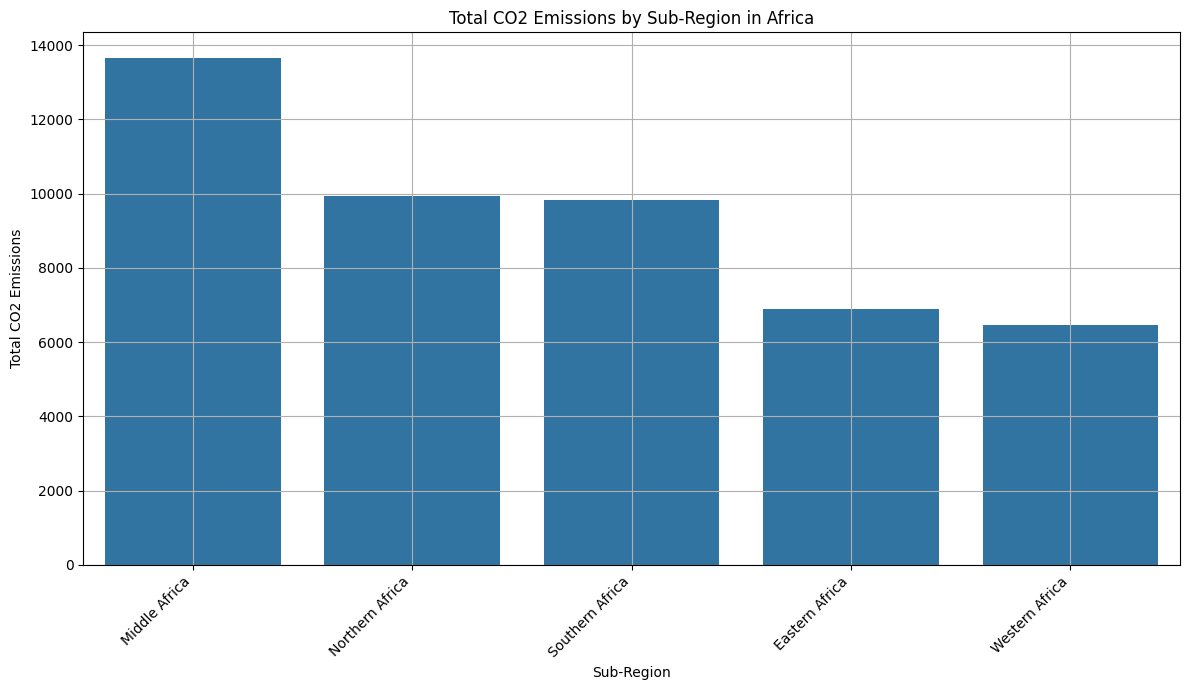

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate CO2 emissions by Sub-Region
subregion_co2 = df.groupby('Sub-Region')['Total CO2 Emission including LUCF (Mt)'].sum().reset_index()

# Sort for better visualization
subregion_co2 = subregion_co2.sort_values(by='Total CO2 Emission including LUCF (Mt)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Sub-Region', y='Total CO2 Emission including LUCF (Mt)', data=subregion_co2)
plt.title('Total CO2 Emissions by Sub-Region in Africa')
plt.xlabel('Sub-Region')
plt.ylabel('Total CO2 Emissions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

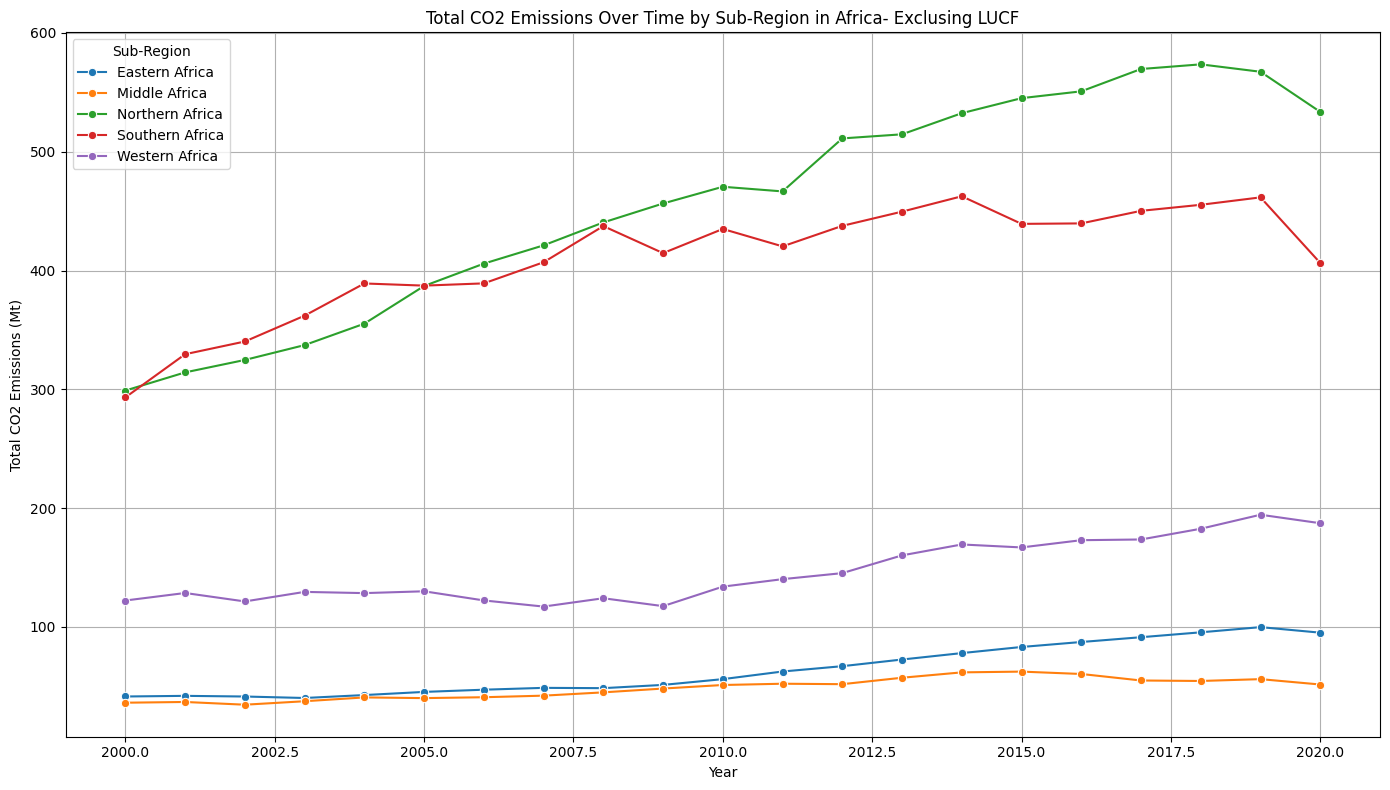

In [ ]:
# Aggregate CO2 emissions by Year and Sub-Region
subregion_year_co2 = df.groupby(['Year', 'Sub-Region'])['Total CO2 Emission excluding LUCF (Mt)'].sum().reset_index()

# Create a line plot with different lines for each sub-region
plt.figure(figsize=(14, 8))
sns.lineplot(data=subregion_year_co2, x='Year', y='Total CO2 Emission excluding LUCF (Mt)', hue='Sub-Region', marker='o')
plt.title('Total CO2 Emissions Over Time by Sub-Region in Africa- Exclusing LUCF')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.grid(True)
plt.legend(title='Sub-Region')
plt.tight_layout()
plt.show()

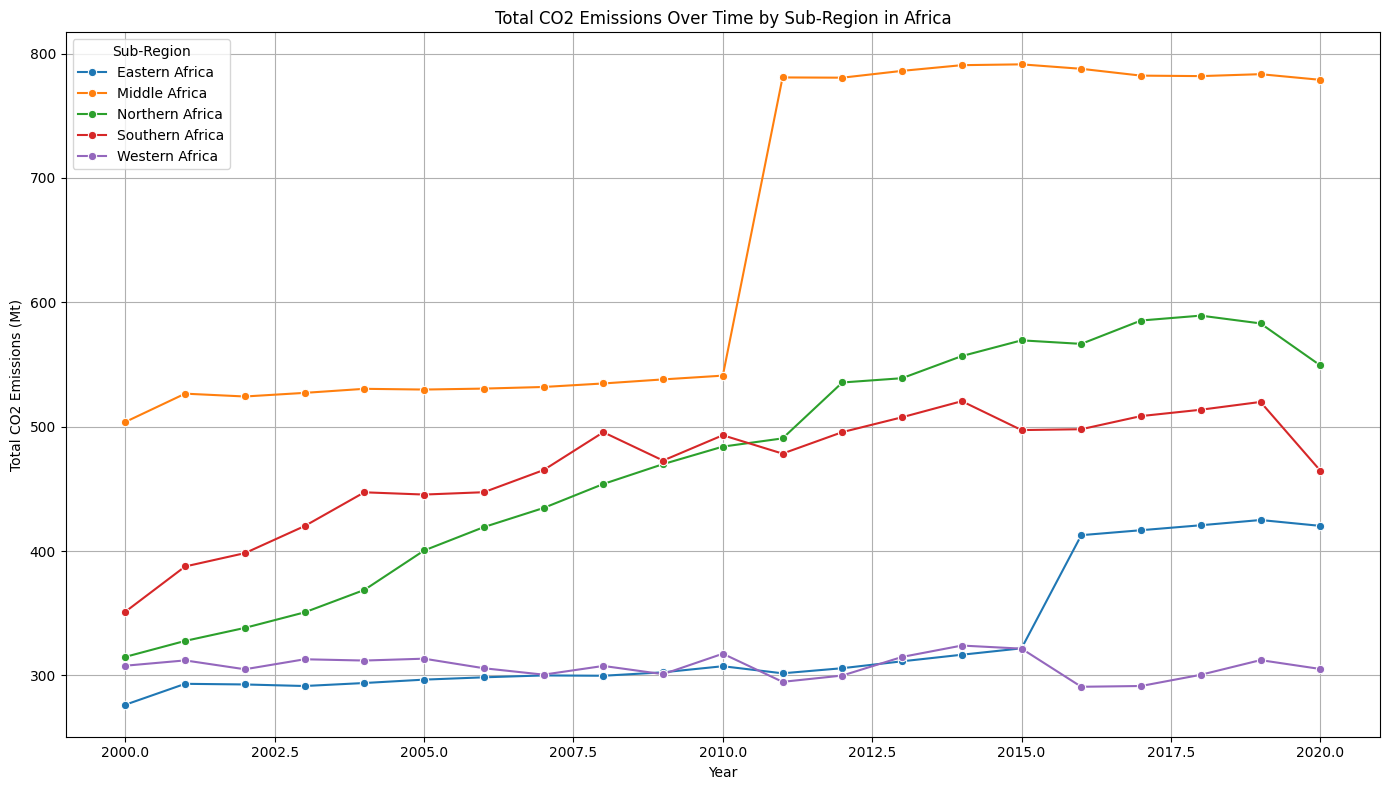

In [ ]:
# Aggregate CO2 emissions by Year and Sub-Region
subregion_year_co2 = df.groupby(['Year', 'Sub-Region'])['Total CO2 Emission including LUCF (Mt)'].sum().reset_index()

# Create a line plot with different lines for each sub-region
plt.figure(figsize=(14, 8))
sns.lineplot(data=subregion_year_co2, x='Year', y='Total CO2 Emission including LUCF (Mt)', hue='Sub-Region', marker='o')
plt.title('Total CO2 Emissions Over Time by Sub-Region in Africa')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.grid(True)
plt.legend(title='Sub-Region')
plt.tight_layout()
plt.show()

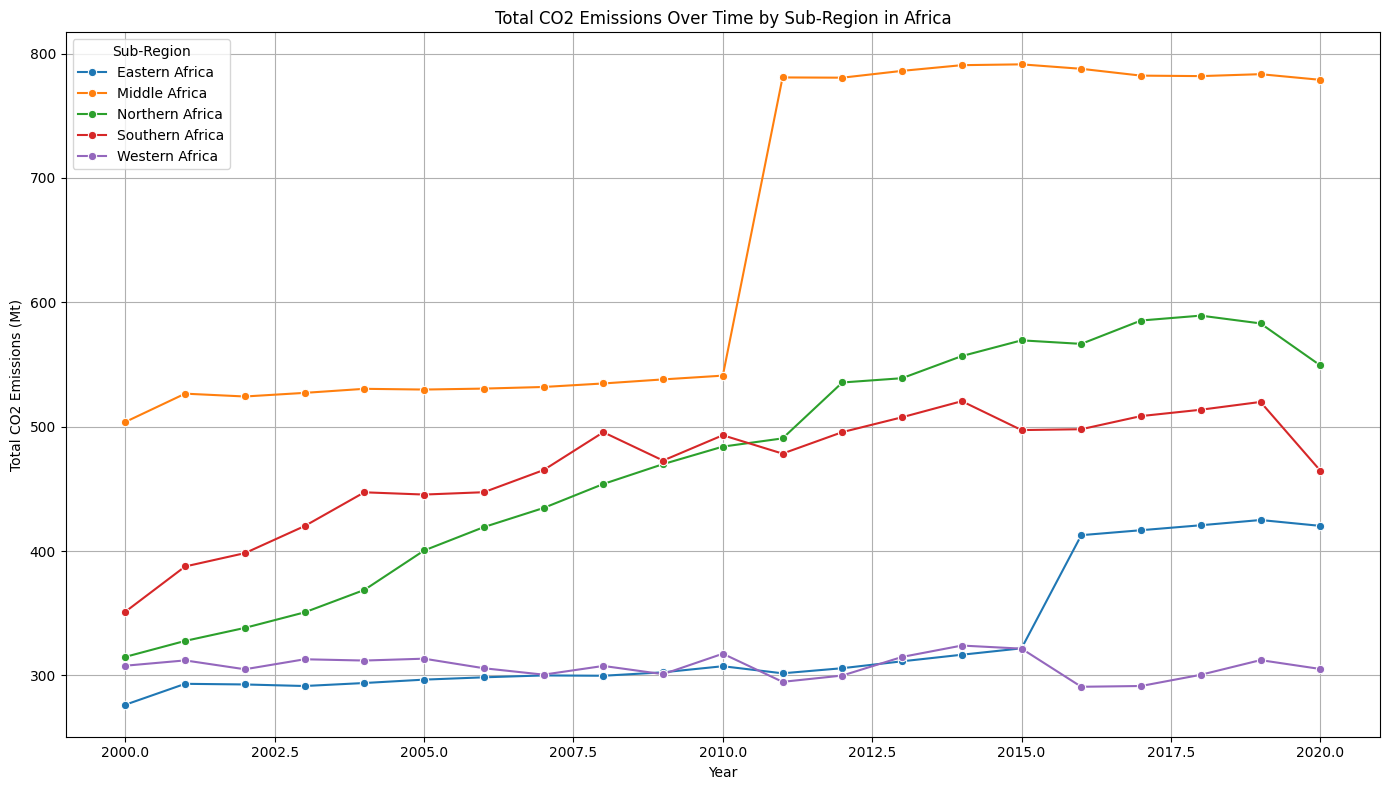

In [ ]:
# Aggregate CO2 emissions by Year and Sub-Region
subregion_year_co2 = df.groupby(['Year', 'Sub-Region'])['Total CO2 Emission including LUCF (Mt)'].sum().reset_index()

# Create a line plot with different lines for each sub-region
plt.figure(figsize=(14, 8))
sns.lineplot(data=subregion_year_co2, x='Year', y='Total CO2 Emission including LUCF (Mt)', hue='Sub-Region', marker='o')
plt.title('Total CO2 Emissions Over Time by Sub-Region in Africa')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.grid(True)
plt.legend(title='Sub-Region')
plt.tight_layout()
plt.show()


Highest Emitter per Sub-Region:


,Country,Sub-Region,Total CO2 Emission excluding LUCF (Mt)
521,Kenya,Eastern Africa,20.10
36,Angola,Middle Africa,31.65
311,Egypt,Northern Africa,244.54
959,South Africa,Southern Africa,448.30
796,Nigeria,Western Africa,119.54


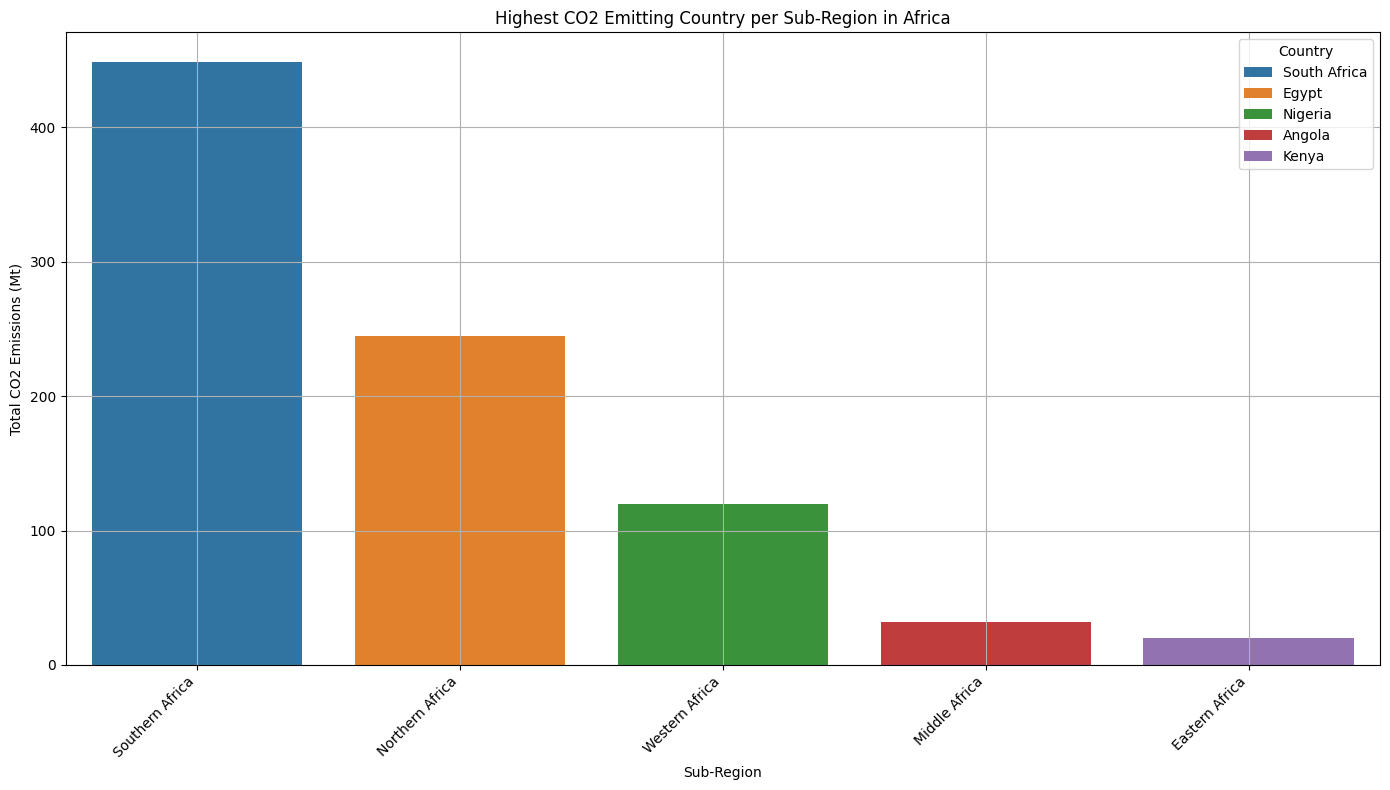

In [ ]:
# prompt: identify and vizualise highest emitters per region

import matplotlib.pyplot as plt
# Find the highest emitter per Sub-Region
highest_emitter_per_subregion = df.loc[df.groupby('Sub-Region')['Total CO2 Emission excluding LUCF (Mt)'].idxmax()]

print("\nHighest Emitter per Sub-Region:")
display(highest_emitter_per_subregion[['Country', 'Sub-Region', 'Total CO2 Emission excluding LUCF (Mt)']])

# Visualize the highest emitters per region
plt.figure(figsize=(14, 8))
sns.barplot(x='Sub-Region', y='Total CO2 Emission excluding LUCF (Mt)', hue='Country', data=highest_emitter_per_subregion.sort_values(by='Total CO2 Emission excluding LUCF (Mt)', ascending=False), dodge=False) # dodge=False ensures bars are next to each other for each region
plt.title('Highest CO2 Emitting Country per Sub-Region in Africa')
plt.xlabel('Sub-Region')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


Highest Emitter per Sub-Region:


,Country,Sub-Region,Total CO2 Emission including LUCF (Mt)
1131,Zimbabwe,Eastern Africa,98.23
266,Democratic Republic of Congo,Middle Africa,606.39
311,Egypt,Northern Africa,244.72
959,South Africa,Southern Africa,454.71
796,Nigeria,Western Africa,165.54


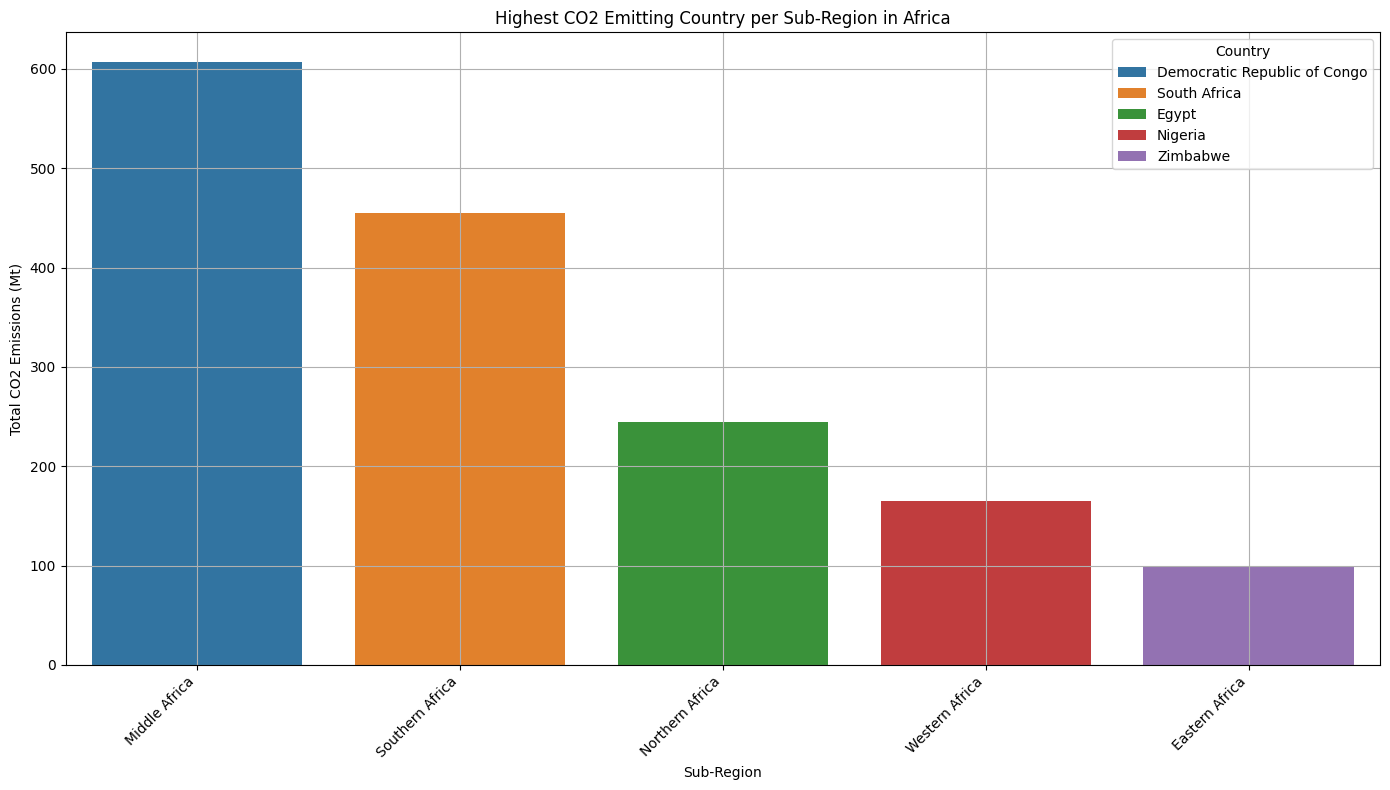

In [ ]:
# prompt: identify and vizualise highest emitters per region

import matplotlib.pyplot as plt
# Find the highest emitter per Sub-Region
highest_emitter_per_subregion = df.loc[df.groupby('Sub-Region')['Total CO2 Emission including LUCF (Mt)'].idxmax()]

print("\nHighest Emitter per Sub-Region:")
display(highest_emitter_per_subregion[['Country', 'Sub-Region', 'Total CO2 Emission including LUCF (Mt)']])

# Visualize the highest emitters per region
plt.figure(figsize=(14, 8))
sns.barplot(x='Sub-Region', y='Total CO2 Emission including LUCF (Mt)', hue='Country', data=highest_emitter_per_subregion.sort_values(by='Total CO2 Emission including LUCF (Mt)', ascending=False), dodge=False) # dodge=False ensures bars are next to each other for each region
plt.title('Highest CO2 Emitting Country per Sub-Region in Africa')
plt.xlabel('Sub-Region')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Hypothesis :** Top emitting countries have high energy emissions due to use of fossil fuels like coal, diesel as well as Oil & Gas  extraction


Top 5 overall CO2 emitting countries: ['South Africa', 'Egypt', 'Algeria', 'Nigeria', 'Morocco']

Highest Contributing Sector for each of the Top 5 Countries (excluding total emission categories):


,Country,Highest Contributing Sector,Contribution Value (Mt)
0,Algeria,Energy (Mt),2406.74
1,Egypt,Energy (Mt),3608.40
2,Morocco,Energy (Mt),982.36
3,Nigeria,Energy (Mt),2001.09
4,South Africa,Energy (Mt),8264.34


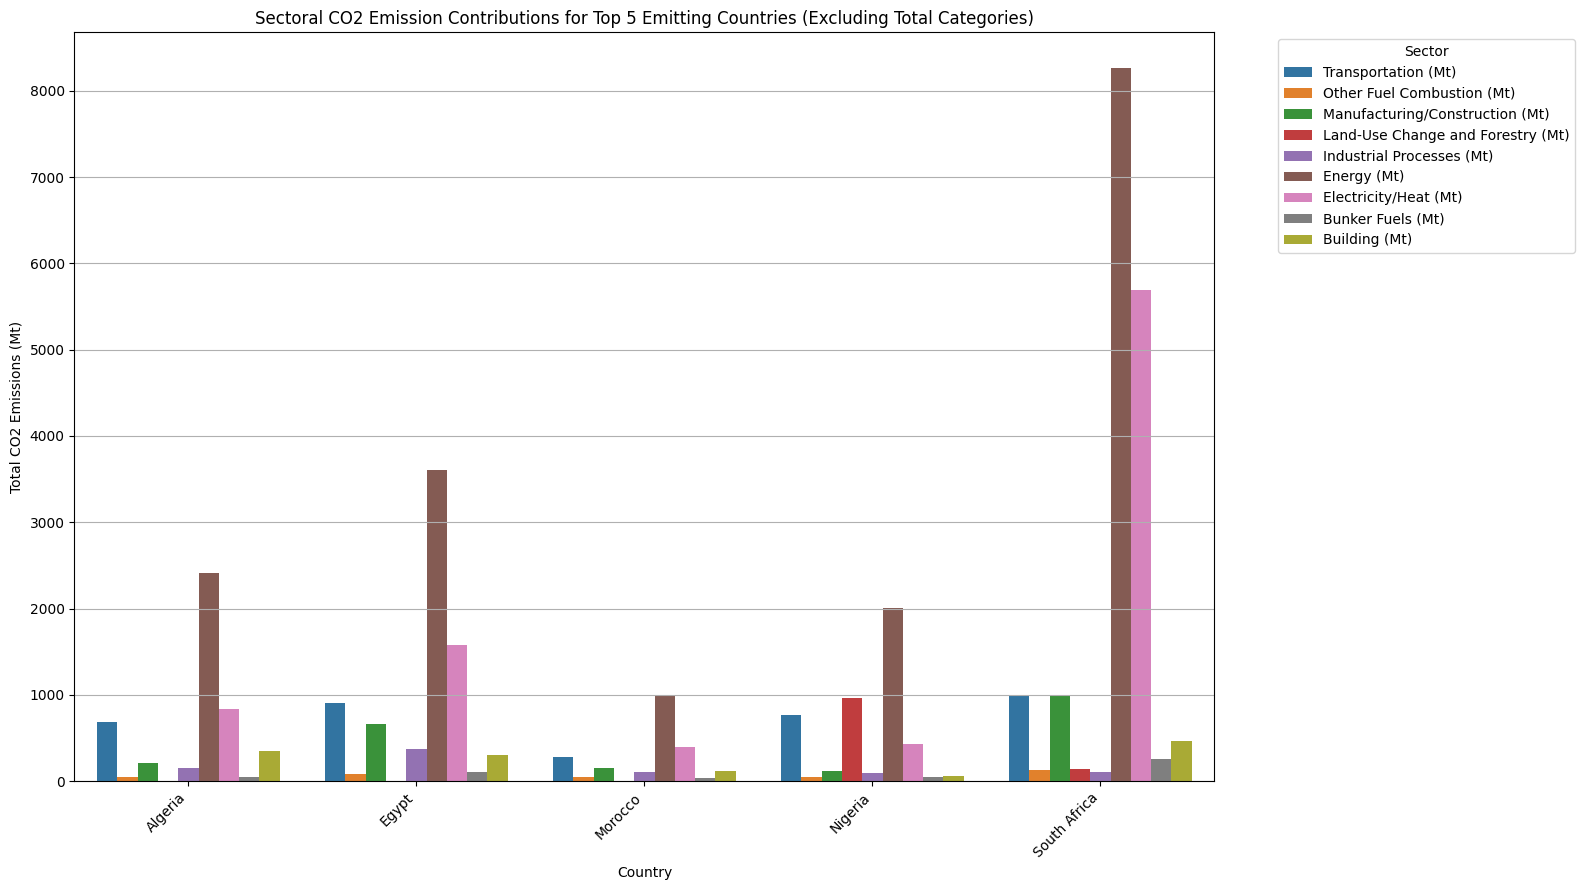


Top 5 CO2 emitting countries per Sub-Region (based on peak emissions):


,Country,Sub-Region,Year,Total CO2 Emission excluding LUCF (Mt)
0,Kenya,Eastern Africa,2017,20.10
1,Kenya,Eastern Africa,2019,19.48
2,Kenya,Eastern Africa,2020,19.45
3,Kenya,Eastern Africa,2016,19.31
4,Kenya,Eastern Africa,2018,19.25
5,Angola,Middle Africa,2015,31.65
6,Angola,Middle Africa,2014,29.61
7,Angola,Middle Africa,2016,29.52
8,Angola,Middle Africa,2013,26.96
9,Angola,Middle Africa,2017,25.06



Highest Contributing Sector for each of the Top Countries per Sub-Region (excluding LUCF):


,Sub-Region,Country,Highest Contributing Sector,Contribution Value (Mt)
0,Eastern Africa,Kenya,Energy (Mt),81.47
1,Middle Africa,Angola,Land-Use Change and Forestry (Mt),177.50
2,Northern Africa,Egypt,Energy (Mt),1055.35
3,Southern Africa,South Africa,Energy (Mt),2180.84
4,Western Africa,Nigeria,Energy (Mt),527.12


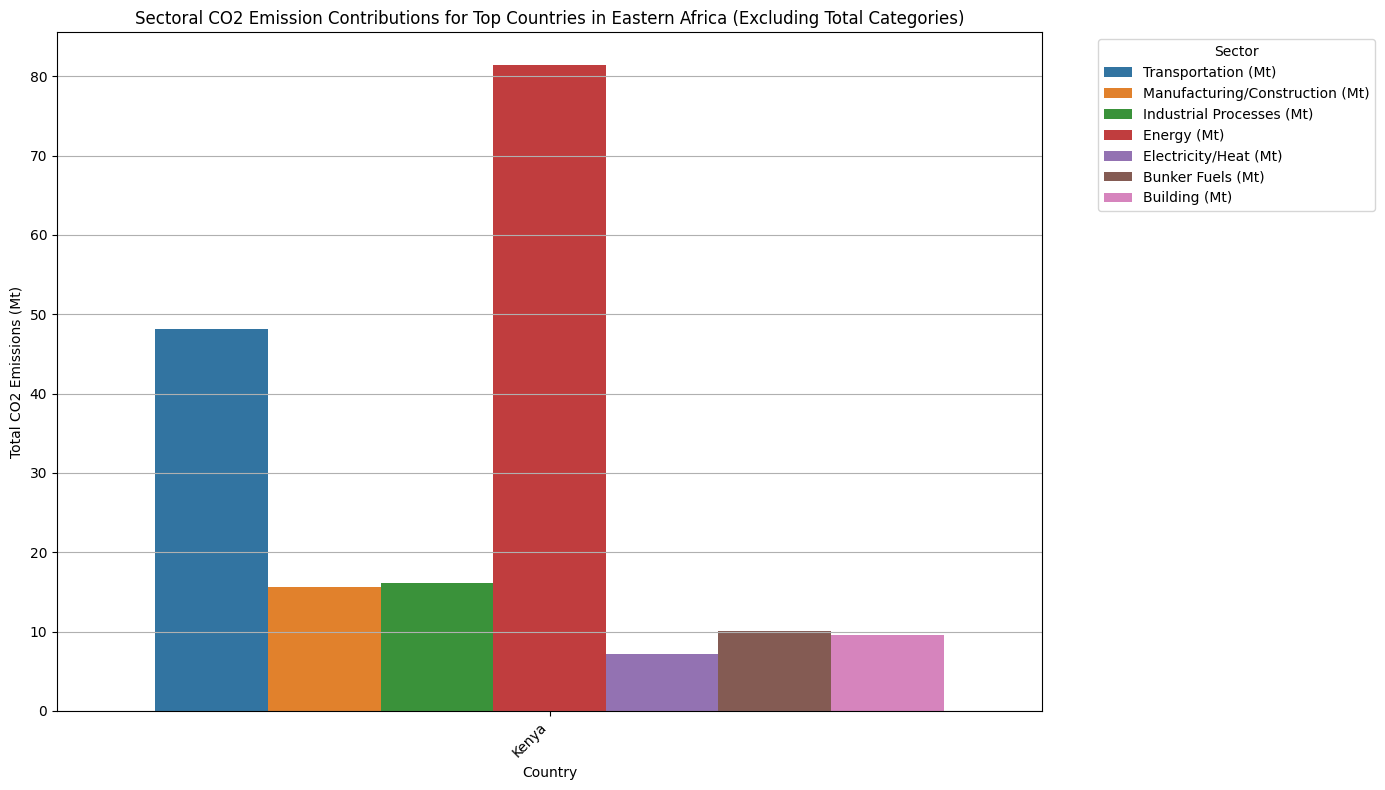

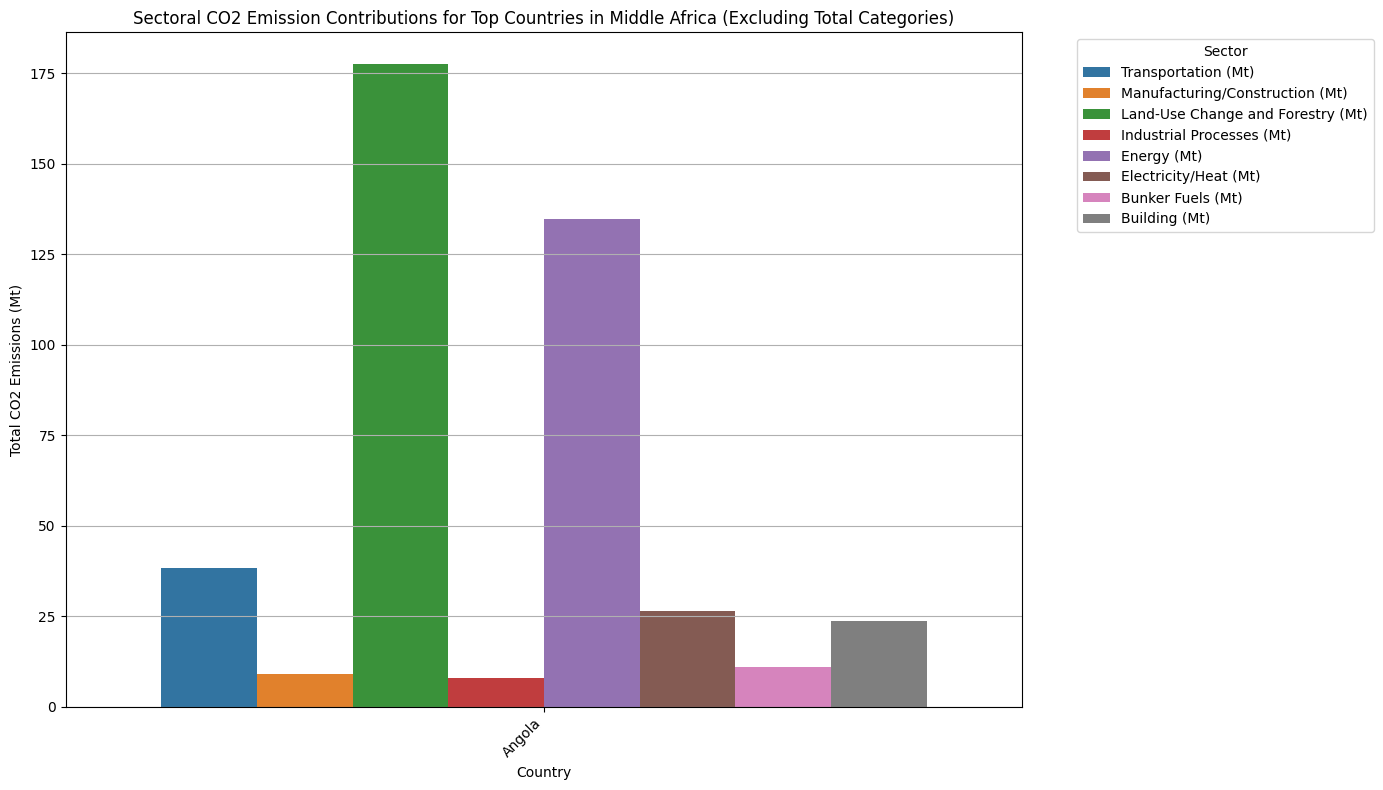

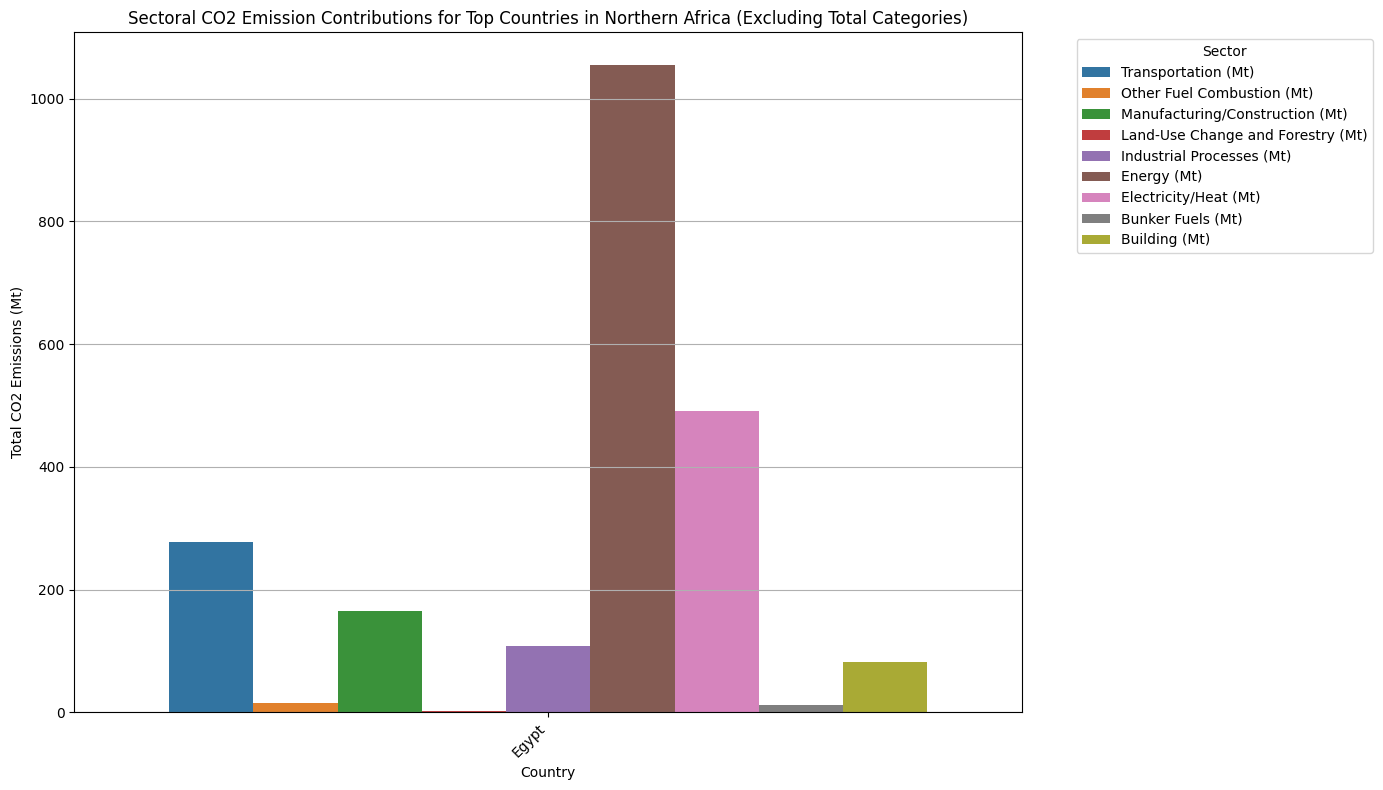

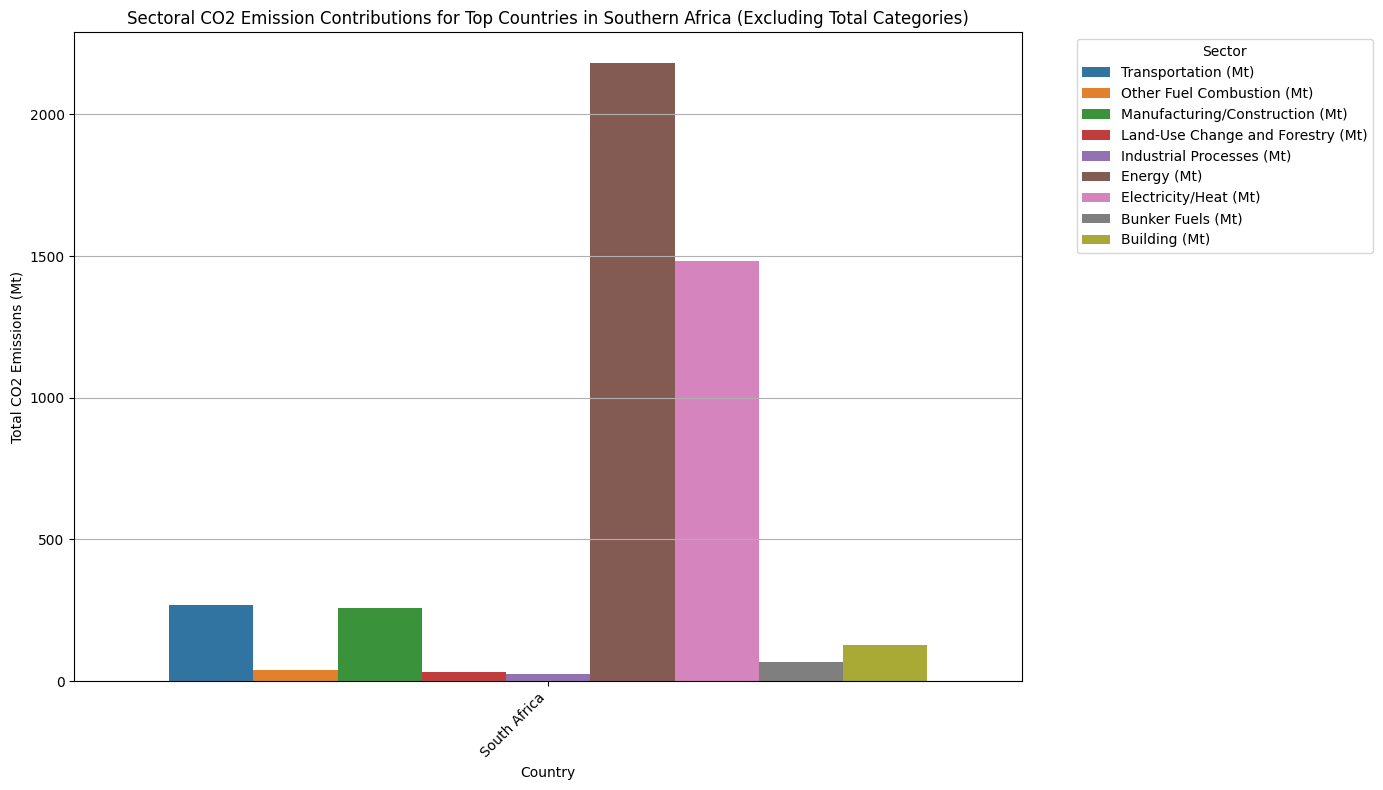

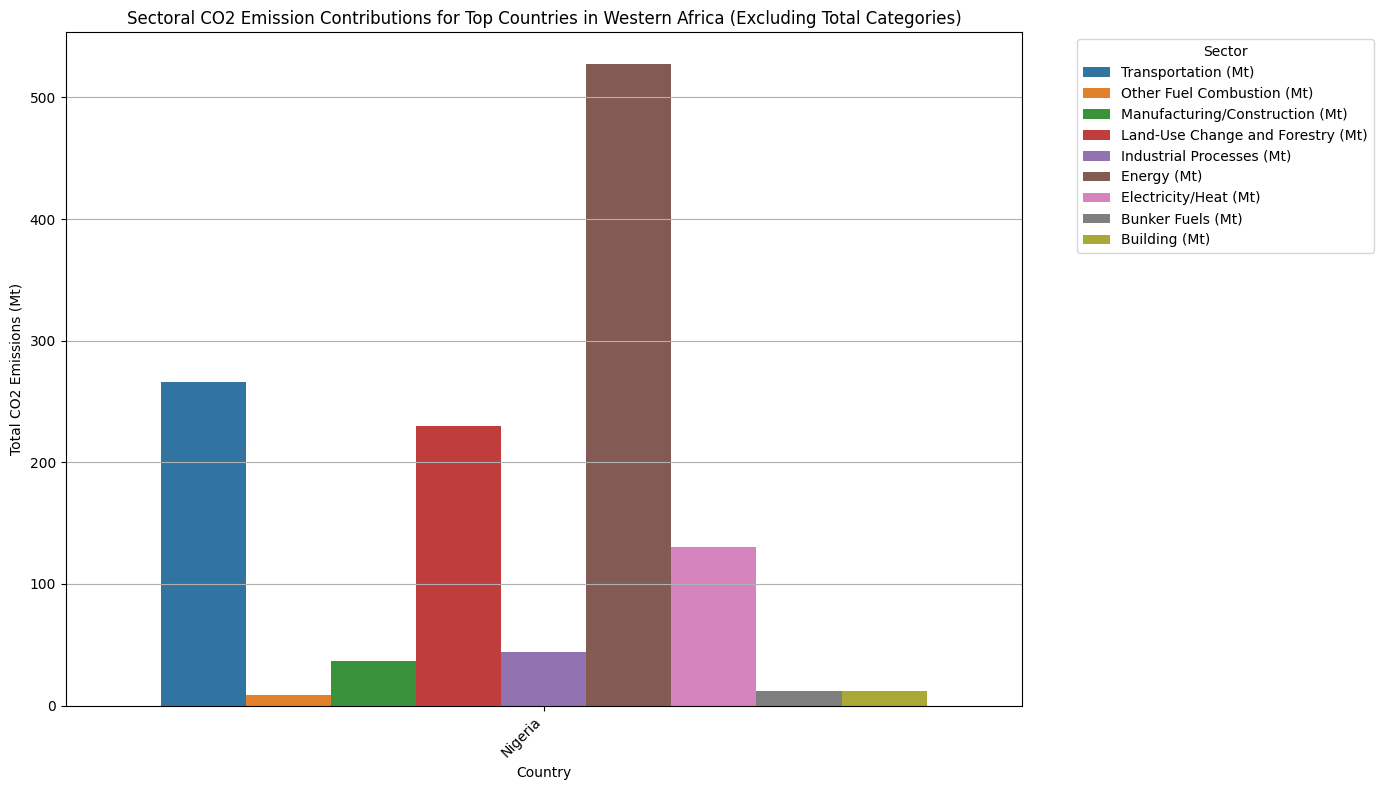

In [ ]:
#identify and visualise highst contribution sector from all sectors in the data inclusing lucf, fuels etc for the 5 countries identified per subregion

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 countries by total CO2 emissions across all years
top_countries_all_time = df.groupby('Country')['Total CO2 Emission excluding LUCF (Mt)'].sum().nlargest(5).index.tolist()

print(f"\nTop 5 overall CO2 emitting countries: {top_countries_all_time}")

# Define the columns that represent different sectors of emissions, excluding total emission columns
# Corrected sector column names based on the dataframe
sector_columns = [
    'Transportation (Mt)',
    'Other Fuel Combustion (Mt)',
    'Manufacturing/Construction (Mt)',
    'Land-Use Change and Forestry (Mt)',
    'Industrial Processes (Mt)',
    'Energy (Mt)',
    'Electricity/Heat (Mt)',
    'Bunker Fuels (Mt)',
    'Building (Mt)'
]

# Ensure all sector columns exist in the dataframe - this check is already there
sector_columns_present = [col for col in sector_columns if col in df.columns]

# Filter data for the top 5 countries
df_top_countries = df[df['Country'].isin(top_countries_all_time)].copy()

# Group by Country and sum the emissions for each sector
sector_contributions = df_top_countries.groupby('Country')[sector_columns_present].sum()

# Find the sector with the highest contribution for each of the top countries
highest_contribution_sector = sector_contributions.idxmax(axis=1)
highest_contribution_value = sector_contributions.max(axis=1)

# Create a dataframe to easily visualize the highest contribution sector
highest_contribution_df = pd.DataFrame({
    'Highest Contributing Sector': highest_contribution_sector,
    'Contribution Value (Mt)': highest_contribution_value
}).reset_index()

print("\nHighest Contributing Sector for each of the Top 5 Countries (excluding total emission categories):")
display(highest_contribution_df)

# Reshape the data for plotting sector contributions for top countries
sector_contributions_melted = sector_contributions.reset_index().melt(
    id_vars='Country',
    value_vars=sector_columns_present,
    var_name='Sector',
    value_name='Total Emissions (Mt)'
)

# Filter out sectors with zero or near-zero contribution if desired for cleaner plot
sector_contributions_melted = sector_contributions_melted[sector_contributions_melted['Total Emissions (Mt)'] > 1] # Filter out negligible contributions

# Visualize sector contributions for the top 5 countries
plt.figure(figsize=(16, 9))
sns.barplot(data=sector_contributions_melted, x='Country', y='Total Emissions (Mt)', hue='Sector', dodge=True)
plt.title('Sectoral CO2 Emission Contributions for Top 5 Emitting Countries (Excluding Total Categories)')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Now, analyze the highest contribution sector for the top 5 countries *within each sub-region*.

# First, identify the top 5 countries *per sub-region* based on total emissions
def get_top_countries_per_subregion(df, n=5):
    # Sort by total CO2 emission within each sub-region and take the top n, reset index to make it a DataFrame
    return df.loc[df.groupby('Sub-Region')['Total CO2 Emission excluding LUCF (Mt)'].nlargest(n).reset_index(level=0, drop=True).index].reset_index(drop=True)


top_countries_per_subregion_df = get_top_countries_per_subregion(df, n=5)


print(f"\nTop 5 CO2 emitting countries per Sub-Region (based on peak emissions):")
display(top_countries_per_subregion_df[['Country', 'Sub-Region', 'Year', 'Total CO2 Emission excluding LUCF (Mt)']])


# Group by Sub-Region and Country, and sum the emissions for each sector for these top countries
sector_contributions_per_subregion = top_countries_per_subregion_df.groupby(['Sub-Region', 'Country'])[sector_columns_present].sum()

# Find the sector with the highest contribution for each country within each sub-region
highest_contribution_sector_per_subregion = sector_contributions_per_subregion.idxmax(axis=1)
highest_contribution_value_per_subregion = sector_contributions_per_subregion.max(axis=1)

# Create a dataframe to easily visualize the highest contribution sector per sub-region
highest_contribution_per_subregion_df = pd.DataFrame({
    'Highest Contributing Sector': highest_contribution_sector_per_subregion,
    'Contribution Value (Mt)': highest_contribution_value_per_subregion
}).reset_index()

print("\nHighest Contributing Sector for each of the Top Countries per Sub-Region (excluding LUCF):")
display(highest_contribution_per_subregion_df)


# Reshape the data for plotting sector contributions per sub-region for the top countries
sector_contributions_per_subregion_melted = sector_contributions_per_subregion.reset_index().melt(
    id_vars=['Sub-Region', 'Country'],
    value_vars=sector_columns_present,
    var_name='Sector',
    value_name='Total Emissions (Mt)'
)

# Filter out sectors with zero or near-zero contribution
sector_contributions_per_subregion_melted = sector_contributions_per_subregion_melted[sector_contributions_per_subregion_melted['Total Emissions (Mt)'] > 1] # Filter out negligible contributions


# Visualize sector contributions for the top countries per sub-region
# We'll create separate plots for each sub-region for clarity
for subregion in highest_contribution_per_subregion_df['Sub-Region'].unique():
    plt.figure(figsize=(14, 8))
    data_to_plot = sector_contributions_per_subregion_melted[sector_contributions_per_subregion_melted['Sub-Region'] == subregion]

    # Check if there's data to plot for this subregion
    if not data_to_plot.empty:
        sns.barplot(data=data_to_plot, x='Country', y='Total Emissions (Mt)', hue='Sector', dodge=True)
        plt.title(f'Sectoral CO2 Emission Contributions for Top Countries in {subregion} (Excluding Total Categories)')
        plt.xlabel('Country')
        plt.ylabel('Total CO2 Emissions (Mt)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to plot for sub-region: {subregion}")


Top 5 overall CO2 emitting countries: ['Democratic Republic of Congo', 'South Africa', 'Egypt', 'Nigeria', 'Algeria']

Highest Contributing Sector for each of the Top 5 Countries (excluding total emission categories):


,Country,Highest Contributing Sector,Contribution Value (Mt)
0,Algeria,Energy (Mt),2406.74
1,Democratic Republic of Congo,Land-Use Change and Forestry (Mt),10055.93
2,Egypt,Energy (Mt),3608.40
3,Nigeria,Energy (Mt),2001.09
4,South Africa,Energy (Mt),8264.34


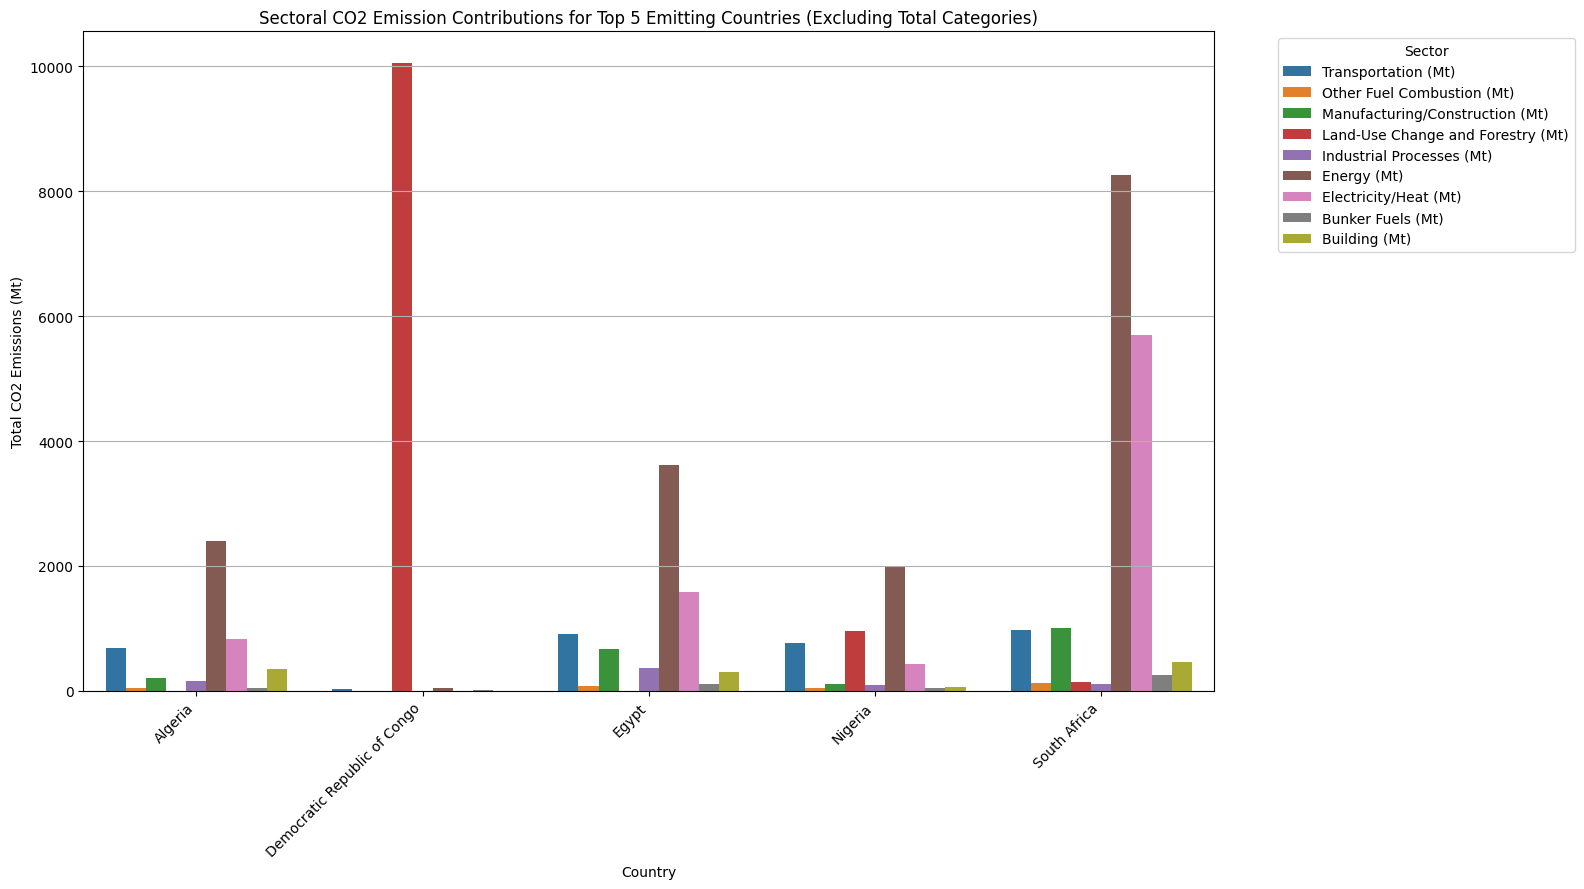


Top 5 CO2 emitting countries per Sub-Region (based on peak emissions):


,Country,Sub-Region,Year,Total CO2 Emission including LUCF (Mt)
0,Zimbabwe,Eastern Africa,2018,98.23
1,Zimbabwe,Eastern Africa,2016,97.61
2,Zimbabwe,Eastern Africa,2019,97.35
3,Zimbabwe,Eastern Africa,2017,96.94
4,Zimbabwe,Eastern Africa,2020,95.48
5,Democratic Republic of Congo,Middle Africa,2014,606.39
6,Democratic Republic of Congo,Middle Africa,2013,605.21
7,Democratic Republic of Congo,Middle Africa,2015,604.49
8,Democratic Republic of Congo,Middle Africa,2019,604.28
9,Democratic Republic of Congo,Middle Africa,2011,604.27



Highest Contributing Sector for each of the Top Countries per Sub-Region (excluding total emission categories):


,Sub-Region,Country,Highest Contributing Sector,Contribution Value (Mt)
0,Eastern Africa,Zimbabwe,Land-Use Change and Forestry (Mt),435.80
1,Middle Africa,Democratic Republic of Congo,Land-Use Change and Forestry (Mt),3006.25
2,Northern Africa,Egypt,Energy (Mt),1055.35
3,Southern Africa,South Africa,Energy (Mt),2180.84
4,Western Africa,Nigeria,Energy (Mt),527.12


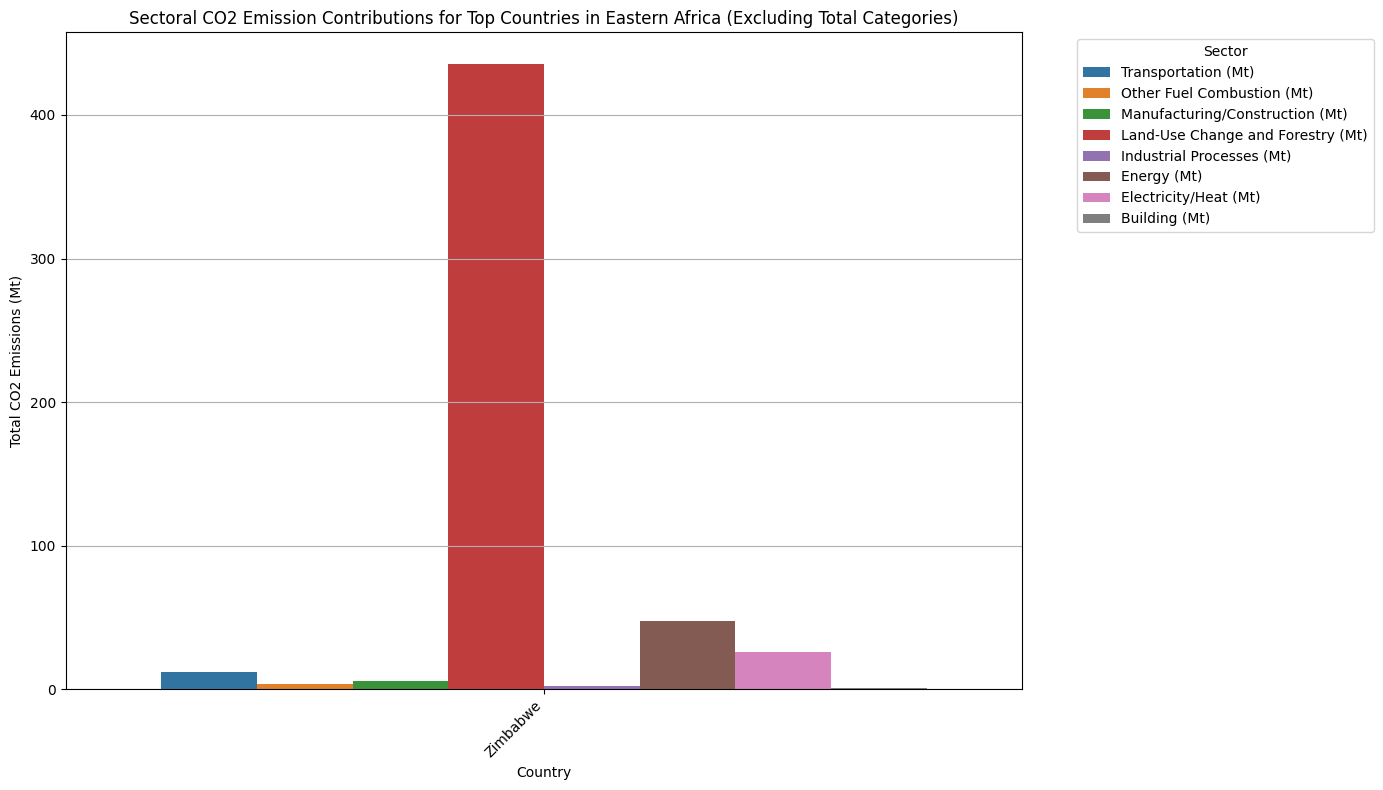

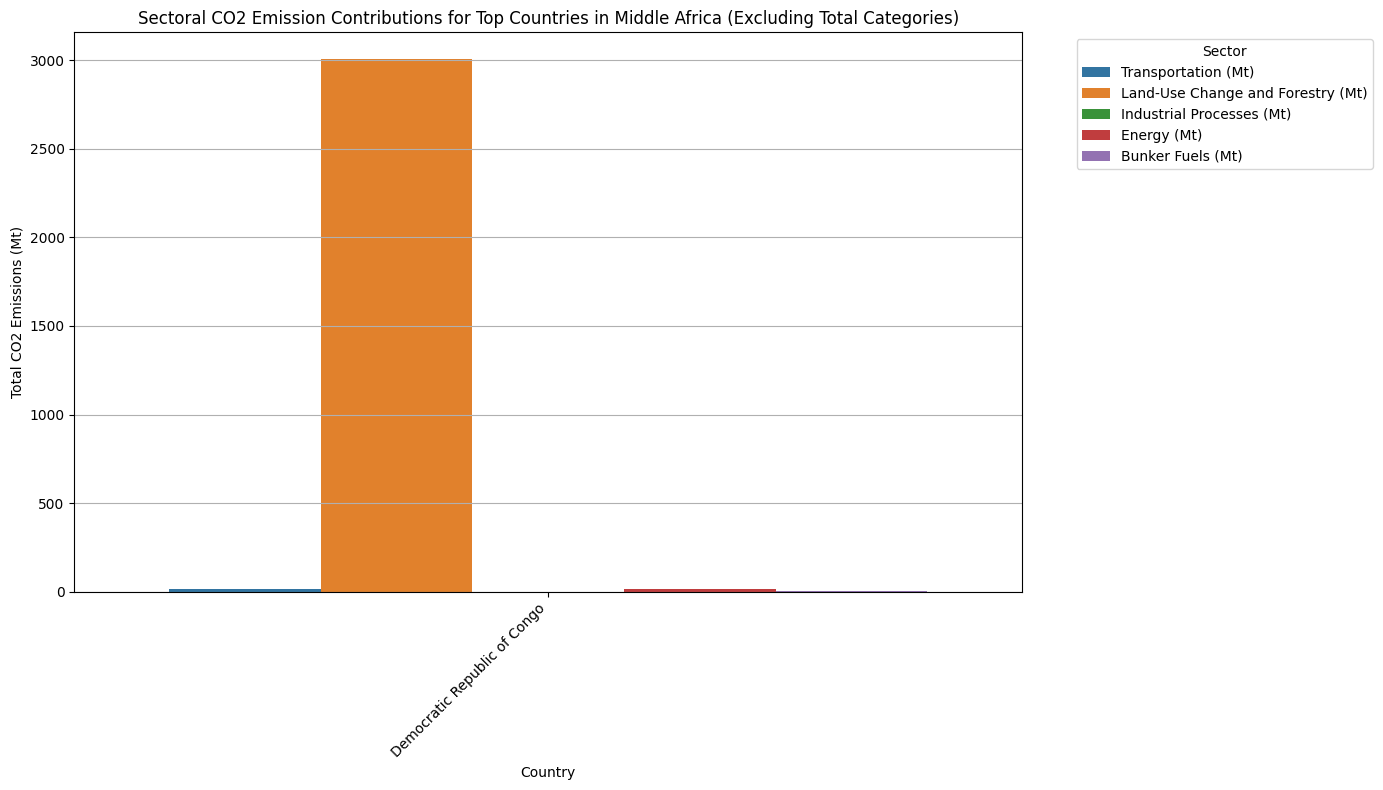

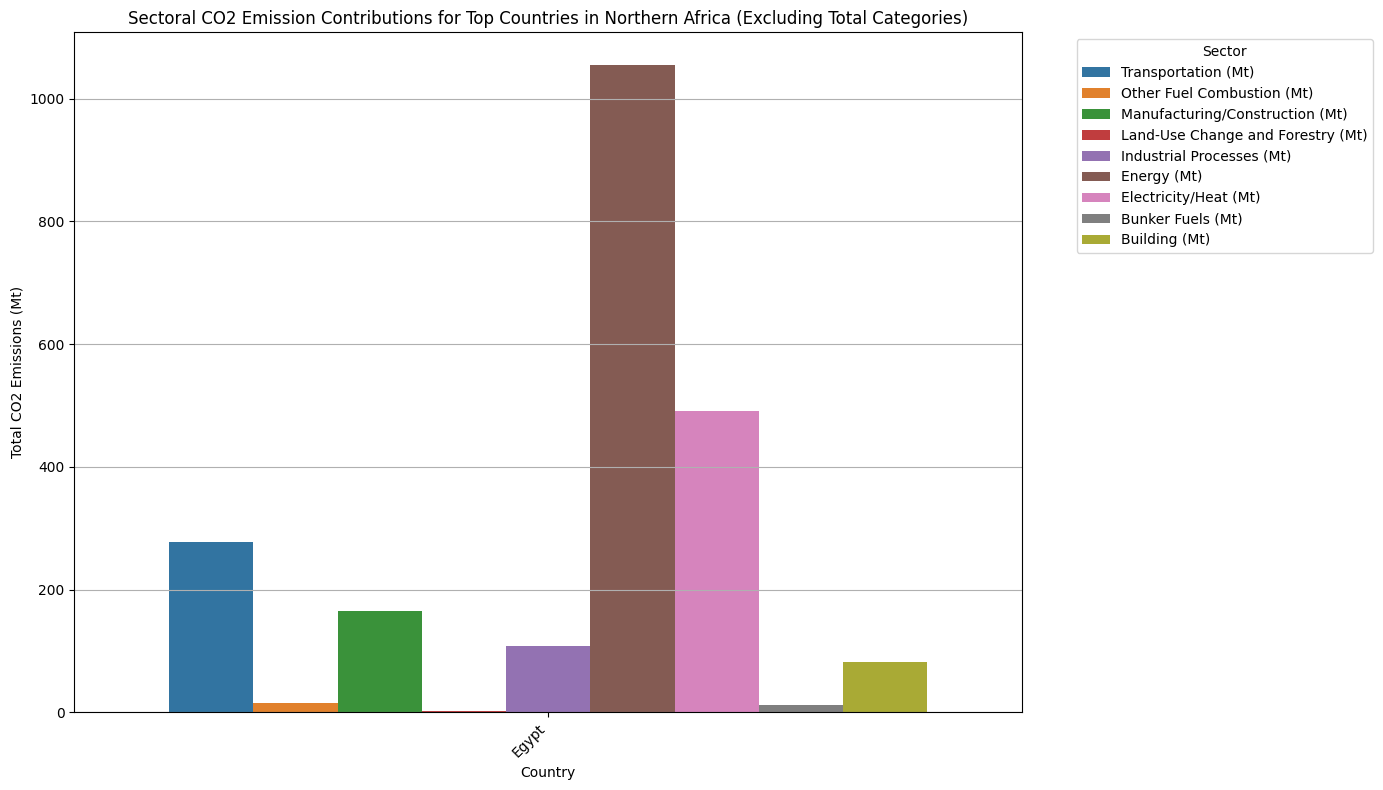

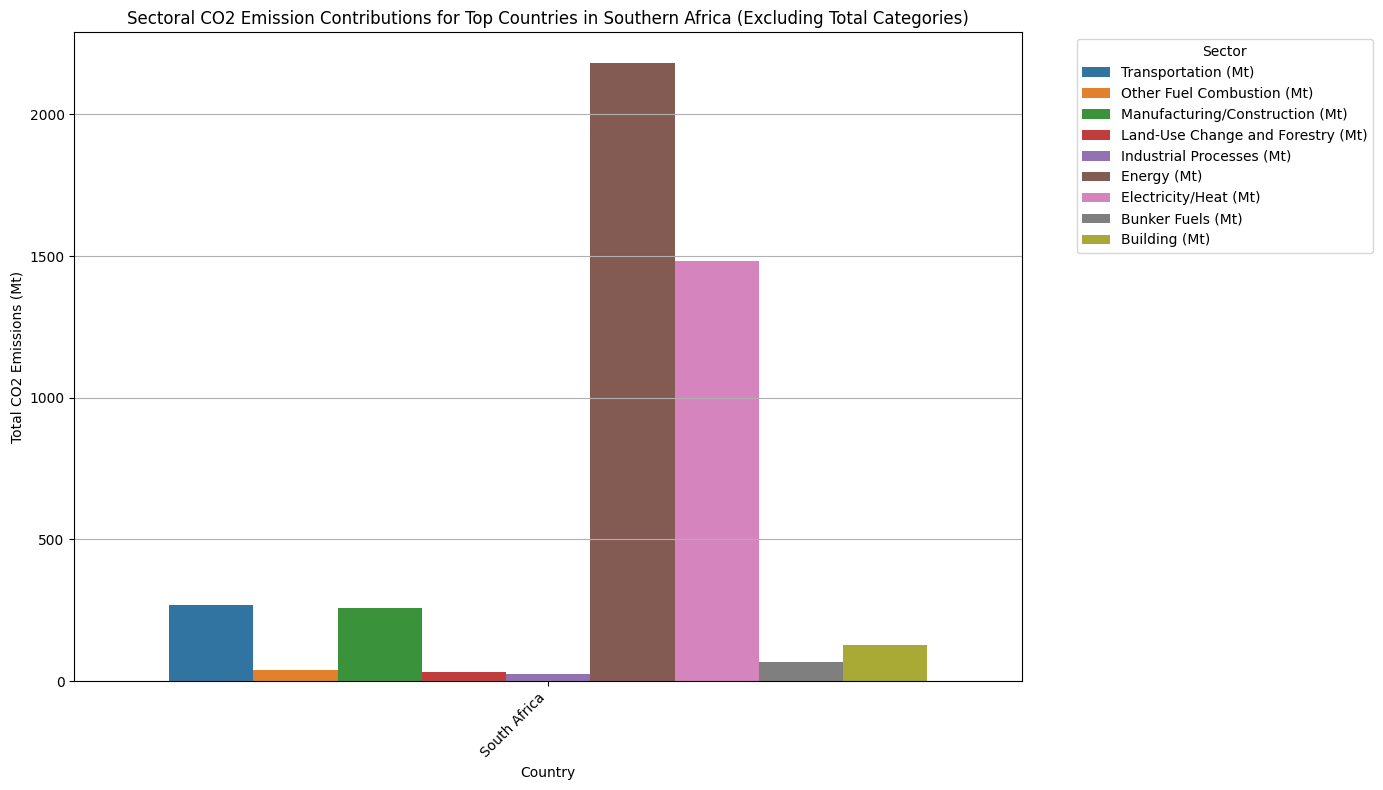

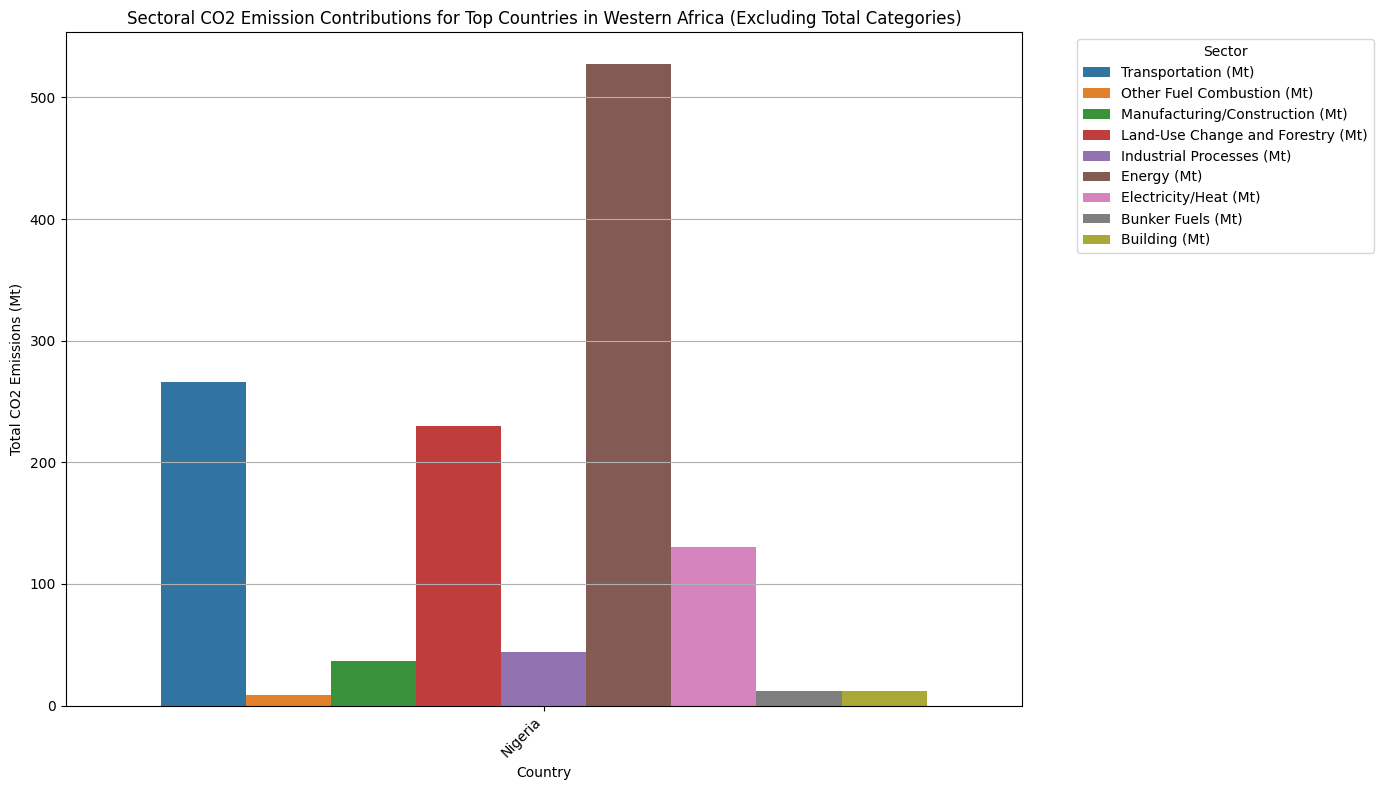

In [ ]:
#identify and visualise highst contribution sector from all sectors in the data inclusing lucf, fuels etc for the 5 countries identified per subregion

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 countries by total CO2 emissions across all years
top_countries_all_time = df.groupby('Country')['Total CO2 Emission including LUCF (Mt)'].sum().nlargest(5).index.tolist()

print(f"\nTop 5 overall CO2 emitting countries: {top_countries_all_time}")

# Define the columns that represent different sectors of emissions, excluding total emission columns
# Corrected sector column names based on the dataframe
sector_columns = [
    'Transportation (Mt)',
    'Other Fuel Combustion (Mt)',
    'Manufacturing/Construction (Mt)',
    'Land-Use Change and Forestry (Mt)',
    'Industrial Processes (Mt)',
    'Energy (Mt)',
    'Electricity/Heat (Mt)',
    'Bunker Fuels (Mt)',
    'Building (Mt)'
]

# Ensure all sector columns exist in the dataframe - this check is already there
sector_columns_present = [col for col in sector_columns if col in df.columns]

# Filter data for the top 5 countries
df_top_countries = df[df['Country'].isin(top_countries_all_time)].copy()

# Group by Country and sum the emissions for each sector
sector_contributions = df_top_countries.groupby('Country')[sector_columns_present].sum()

# Find the sector with the highest contribution for each of the top countries
highest_contribution_sector = sector_contributions.idxmax(axis=1)
highest_contribution_value = sector_contributions.max(axis=1)

# Create a dataframe to easily visualize the highest contribution sector
highest_contribution_df = pd.DataFrame({
    'Highest Contributing Sector': highest_contribution_sector,
    'Contribution Value (Mt)': highest_contribution_value
}).reset_index()

print("\nHighest Contributing Sector for each of the Top 5 Countries (excluding total emission categories):")
display(highest_contribution_df)

# Reshape the data for plotting sector contributions for top countries
sector_contributions_melted = sector_contributions.reset_index().melt(
    id_vars='Country',
    value_vars=sector_columns_present,
    var_name='Sector',
    value_name='Total Emissions (Mt)'
)

# Filter out sectors with zero or near-zero contribution if desired for cleaner plot
sector_contributions_melted = sector_contributions_melted[sector_contributions_melted['Total Emissions (Mt)'] > 1] # Filter out negligible contributions

# Visualize sector contributions for the top 5 countries
plt.figure(figsize=(16, 9))
sns.barplot(data=sector_contributions_melted, x='Country', y='Total Emissions (Mt)', hue='Sector', dodge=True)
plt.title('Sectoral CO2 Emission Contributions for Top 5 Emitting Countries (Excluding Total Categories)')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Now, analyze the highest contribution sector for the top 5 countries *within each sub-region*.

# First, identify the top 5 countries *per sub-region* based on total emissions
def get_top_countries_per_subregion(df, n=5):
    # Sort by total CO2 emission within each sub-region and take the top n, reset index to make it a DataFrame
    return df.loc[df.groupby('Sub-Region')['Total CO2 Emission including LUCF (Mt)'].nlargest(n).reset_index(level=0, drop=True).index].reset_index(drop=True)


top_countries_per_subregion_df = get_top_countries_per_subregion(df, n=5)


print(f"\nTop 5 CO2 emitting countries per Sub-Region (based on peak emissions):")
display(top_countries_per_subregion_df[['Country', 'Sub-Region', 'Year', 'Total CO2 Emission including LUCF (Mt)']])


# Group by Sub-Region and Country, and sum the emissions for each sector for these top countries
sector_contributions_per_subregion = top_countries_per_subregion_df.groupby(['Sub-Region', 'Country'])[sector_columns_present].sum()

# Find the sector with the highest contribution for each country within each sub-region
highest_contribution_sector_per_subregion = sector_contributions_per_subregion.idxmax(axis=1)
highest_contribution_value_per_subregion = sector_contributions_per_subregion.max(axis=1)

# Create a dataframe to easily visualize the highest contribution sector per sub-region
highest_contribution_per_subregion_df = pd.DataFrame({
    'Highest Contributing Sector': highest_contribution_sector_per_subregion,
    'Contribution Value (Mt)': highest_contribution_value_per_subregion
}).reset_index()

print("\nHighest Contributing Sector for each of the Top Countries per Sub-Region (excluding total emission categories):")
display(highest_contribution_per_subregion_df)


# Reshape the data for plotting sector contributions per sub-region for the top countries
sector_contributions_per_subregion_melted = sector_contributions_per_subregion.reset_index().melt(
    id_vars=['Sub-Region', 'Country'],
    value_vars=sector_columns_present,
    var_name='Sector',
    value_name='Total Emissions (Mt)'
)

# Filter out sectors with zero or near-zero contribution
sector_contributions_per_subregion_melted = sector_contributions_per_subregion_melted[sector_contributions_per_subregion_melted['Total Emissions (Mt)'] > 1] # Filter out negligible contributions


# Visualize sector contributions for the top countries per sub-region
# We'll create separate plots for each sub-region for clarity
for subregion in highest_contribution_per_subregion_df['Sub-Region'].unique():
    plt.figure(figsize=(14, 8))
    data_to_plot = sector_contributions_per_subregion_melted[sector_contributions_per_subregion_melted['Sub-Region'] == subregion]

    # Check if there's data to plot for this subregion
    if not data_to_plot.empty:
        sns.barplot(data=data_to_plot, x='Country', y='Total Emissions (Mt)', hue='Sector', dodge=True)
        plt.title(f'Sectoral CO2 Emission Contributions for Top Countries in {subregion} (Excluding Total Categories)')
        plt.xlabel('Country')
        plt.ylabel('Total CO2 Emissions (Mt)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to plot for sub-region: {subregion}")

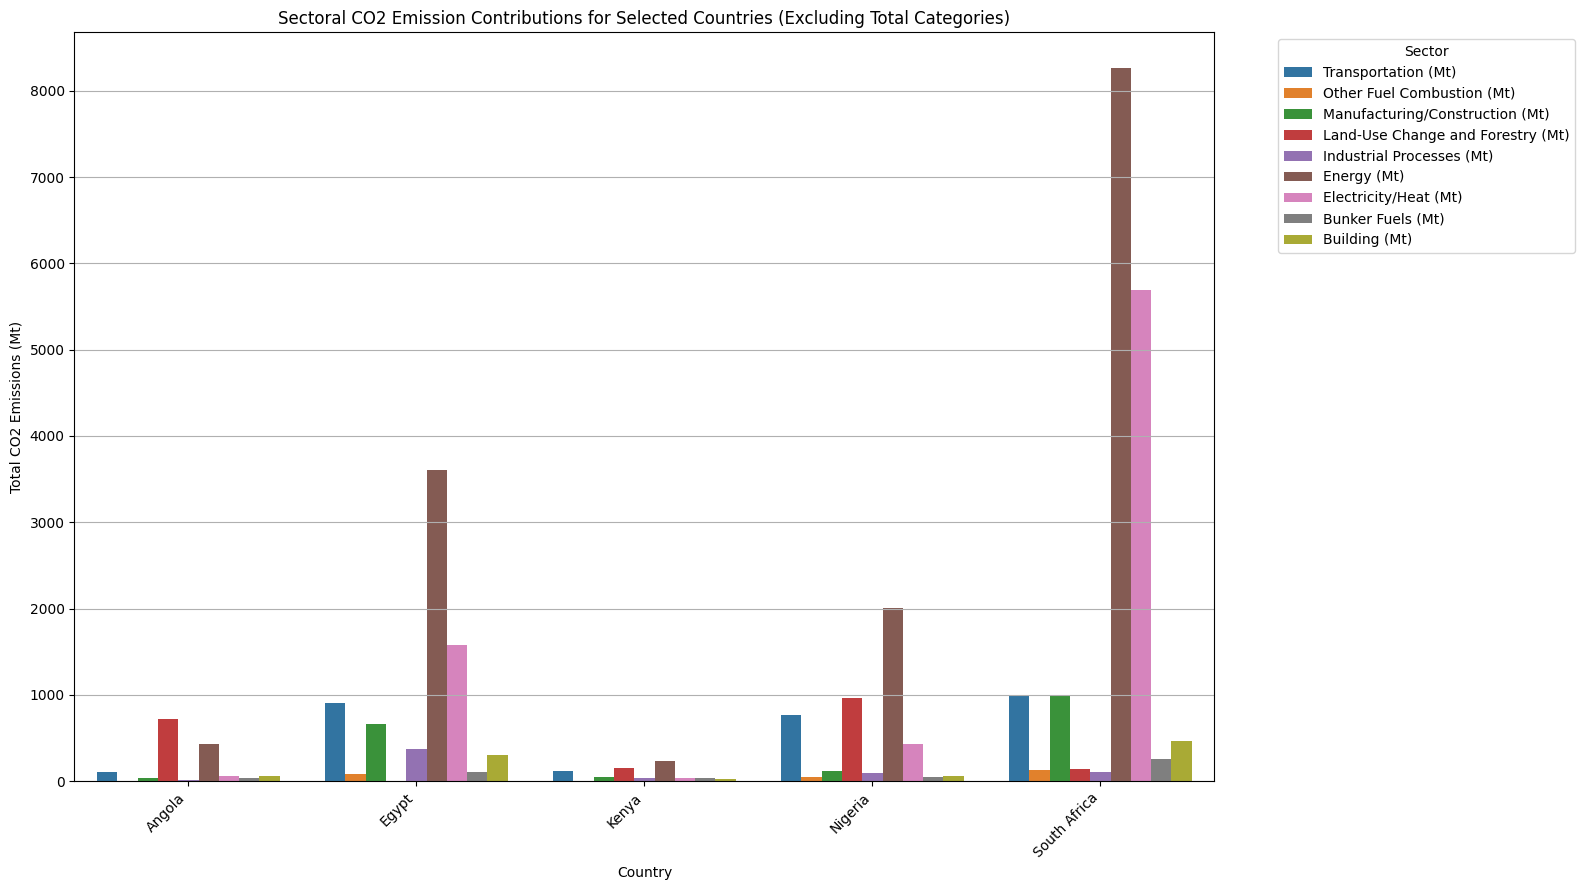

In [ ]:
# prompt: condense the above to one combine bar graph with the bars grouped by the 5 countries I dentified ie South Africa, Egypt, Nigeria and Zimbabwe

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas here as well, in case this cell is run independently

# Define the specific countries you want to visualize
selected_countries = ['South Africa', 'Egypt', 'Nigeria', 'Angola', 'Kenya']

# Filter the original dataframe to include only the selected countries
df_selected_countries = df[df['Country'].isin(selected_countries)].copy()

# Define the columns that represent different sectors of emissions, excluding total emission columns
# Make sure sector_columns is defined or accessible in this scope
# Based on previous cells, it should be defined as:
sector_columns = [
    'Transportation (Mt)',
    'Other Fuel Combustion (Mt)',
    'Manufacturing/Construction (Mt)',
    'Land-Use Change and Forestry (Mt)',
    'Industrial Processes (Mt)',
    'Energy (Mt)',
    'Electricity/Heat (Mt)',
    'Bunker Fuels (Mt)',
    'Building (Mt)'
]


# Ensure the required sector columns are present in the filtered dataframe
sector_columns_present_selected = [col for col in sector_columns if col in df_selected_countries.columns]

# Group by Country and sum the emissions for each sector for the selected countries
sector_contributions_selected = df_selected_countries.groupby('Country')[sector_columns_present_selected].sum()

# Reshape the data for plotting
sector_contributions_selected_melted = sector_contributions_selected.reset_index().melt(
    id_vars='Country',
    value_vars=sector_columns_present_selected,
    var_name='Sector',
    value_name='Total Emissions (Mt)'
)

# Filter out sectors with zero or near-zero contribution for cleaner plot
sector_contributions_selected_melted = sector_contributions_selected_melted[sector_contributions_selected_melted['Total Emissions (Mt)'] > 1]

# Create the combined bar graph
plt.figure(figsize=(16, 9))
sns.barplot(data=sector_contributions_selected_melted, x='Country', y='Total Emissions (Mt)', hue='Sector', dodge=True)
plt.title('Sectoral CO2 Emission Contributions for Selected Countries (Excluding Total Categories)')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **Key Insights**
 - The top emitting countries per region either hve energy or land use as their highest emitting sectors
 - DRC, with landuse as the highest sector,  relies on biomass(wood and charcooal) for fuel, leading to deforestation, Zimbabwe rely  heavily on coal fired power plants,  therefore there is high fossil fuel dependency.
- South Africa generates ver 85% of it's electricity from coal
- Nigeria, riddles with electric grid failure often turns to diesel fueled generators and also have heavy oil and gas extraction industries
- Egypt in the North is heavily powered by natural oil & gas, which drive it's heavy industry and transport sectors.

__Energy therefore seems to be the main underlying factor among these countries__


In [ ]:
# normalize dataset, split to train and test and convert to pytorch tensors for modelling . Import required libraries

import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # Ensure pandas is imported

# Select features (X) and target (y)
# Define the columns to be used as features, excluding non-numeric, identifier, and target columns
feature_columns = [col for col in df.columns if col not in ['Country', 'Code', 'Sub-Region',
                                                            'Total CO2 Emission including LUCF (Mt)',
                                                            'Total CO2 Emission excluding LUCF (Mt)',
                                                            'Green Label', 'Predicted Green Label', 'Predicted Green Label 2020']
                   and df[col].dtype in ['int64', 'float64']] # Only select numeric columns

X = df[feature_columns].copy()
y = df['Total CO2 Emission including LUCF (Mt)']


# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert the numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1) # unsqueeze for target
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

print("Data normalized, split, and converted to PyTorch tensors.")
print(f"Features used for scaling and modeling: {feature_columns}")
print(f"X shape after selecting features: {X.shape}")
print(f"X_train shape: {X_train_tensor.shape}")
print(f"X_test shape: {X_test_tensor.shape}")
print(f"y_train shape: {y_train_tensor.shape}")
print(f"y_test shape: {y_test_tensor.shape}")

Data normalized, split, and converted to PyTorch tensors.
Features used for scaling and modeling: ['Year', 'Population', 'GDP PER CAPITA (USD)', 'GDP PER CAPITA PPP (USD)', 'Area (Km2)', 'Transportation (Mt)', 'Other Fuel Combustion (Mt)', 'Manufacturing/Construction (Mt)', 'Land-Use Change and Forestry (Mt)', 'Industrial Processes (Mt)', 'Energy (Mt)', 'Electricity/Heat (Mt)', 'Bunker Fuels (Mt)', 'Building (Mt)']
X shape after selecting features: (1134, 14)
X_train shape: torch.Size([907, 14])
X_test shape: torch.Size([227, 14])
y_train shape: torch.Size([907, 1])
y_test shape: torch.Size([227, 1])


In [ ]:
# create dataframe from tensors of x train and y train to allow us to view first 5 rows of data with column names

import pandas as pd
# Create DataFrames from tensors
X_train_df = pd.DataFrame(X_train_tensor.numpy(), columns=X.columns)
y_train_df = pd.DataFrame(y_train_tensor.numpy(), columns=['Total CO2 Emission including LUCF (Mt)'])

# Combine X_train and y_train DataFrames for easier viewing
train_data_df = pd.concat([X_train_df, y_train_df], axis=1)

# Display the first 5 rows of the combined training data
print("\nFirst 5 rows of training data (features and target):")
display(train_data_df.head())

# Optional: Display first 5 rows of X_train and y_train DataFrames separately
print("\nFirst 5 rows of X_train DataFrame:")
display(X_train_df.head())

print("\nFirst 5 rows of y_train DataFrame:")
display(y_train_df.head())


First 5 rows of training data (features and target):


,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt),Total CO2 Emission including LUCF (Mt)
0,0.60,0.178536,0.278646,0.393619,1.000000,0.649899,0.406682,0.164484,0.038837,0.337423,0.286890,0.139496,0.151454,0.494554,134.309998
1,0.15,0.350968,0.000375,0.002345,0.463551,0.036339,0.038018,0.015548,0.087415,0.019720,0.010195,0.000032,0.015551,0.032676,34.810001
2,0.15,0.091745,0.011048,0.005822,0.336430,0.018843,0.002304,0.005074,0.117980,0.010517,0.003632,0.000096,0.017579,0.005299,50.830002
3,0.70,0.007982,0.025060,0.027945,0.014981,0.001682,0.011521,0.000000,0.042222,0.000000,0.000474,0.000064,0.002705,0.000883,1.750000
4,0.00,0.028972,0.106871,0.142687,0.260066,0.082489,0.050045,0.041708,0.055525,0.000000,0.000925,0.029762,0.050966,0.042821,10.280000



First 5 rows of X_train DataFrame:


,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,0.60,0.178536,0.278646,0.393619,1.000000,0.649899,0.406682,0.164484,0.038837,0.337423,0.286890,0.139496,0.151454,0.494554
1,0.15,0.350968,0.000375,0.002345,0.463551,0.036339,0.038018,0.015548,0.087415,0.019720,0.010195,0.000032,0.015551,0.032676
2,0.15,0.091745,0.011048,0.005822,0.336430,0.018843,0.002304,0.005074,0.117980,0.010517,0.003632,0.000096,0.017579,0.005299
3,0.70,0.007982,0.025060,0.027945,0.014981,0.001682,0.011521,0.000000,0.042222,0.000000,0.000474,0.000064,0.002705,0.000883
4,0.00,0.028972,0.106871,0.142687,0.260066,0.082489,0.050045,0.041708,0.055525,0.000000,0.000925,0.029762,0.050966,0.042821



First 5 rows of y_train DataFrame:


,Total CO2 Emission including LUCF (Mt)
0,134.309998
1,34.810001
2,50.830002
3,1.750000
4,10.280000


## Model Time!!

In [ ]:
# Define a regression model to predict y  using pytorch with a single libear layer

# Define the Regression Model
class RegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1) # Single linear layer

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_dimension = X_train_tensor.shape[1]
model = RegressionModel(input_dimension)

print("Regression model defined with a single linear layer.")
model

Regression model defined with a single linear layer.


RegressionModel(
  (linear): Linear(in_features=14, out_features=1, bias=True)
)

## Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
# You can adjust hyperparameters like n_estimators, max_depth, etc.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
# Note: scikit-learn models typically work with numpy arrays, so we'll use the original numpy arrays X_train and y_train
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


#### Evaluate the Random Forest Model

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Regressor R-squared: {r2_rf:.2f}")

# Optional: Display actual vs predicted values for a few samples
print("\nActual vs Predicted CO2 Emissions (Random Forest):")
results_rf = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_rf})
display(results_rf.head())

Random Forest Regressor Mean Squared Error: 10.75
Random Forest Regressor R-squared: 1.00

Actual vs Predicted CO2 Emissions (Random Forest):


,Actual,Predicted
0,127.12,133.7124
1,0.60,0.5853
2,12.22,12.1852
3,12.65,12.6565
4,13.86,14.0217


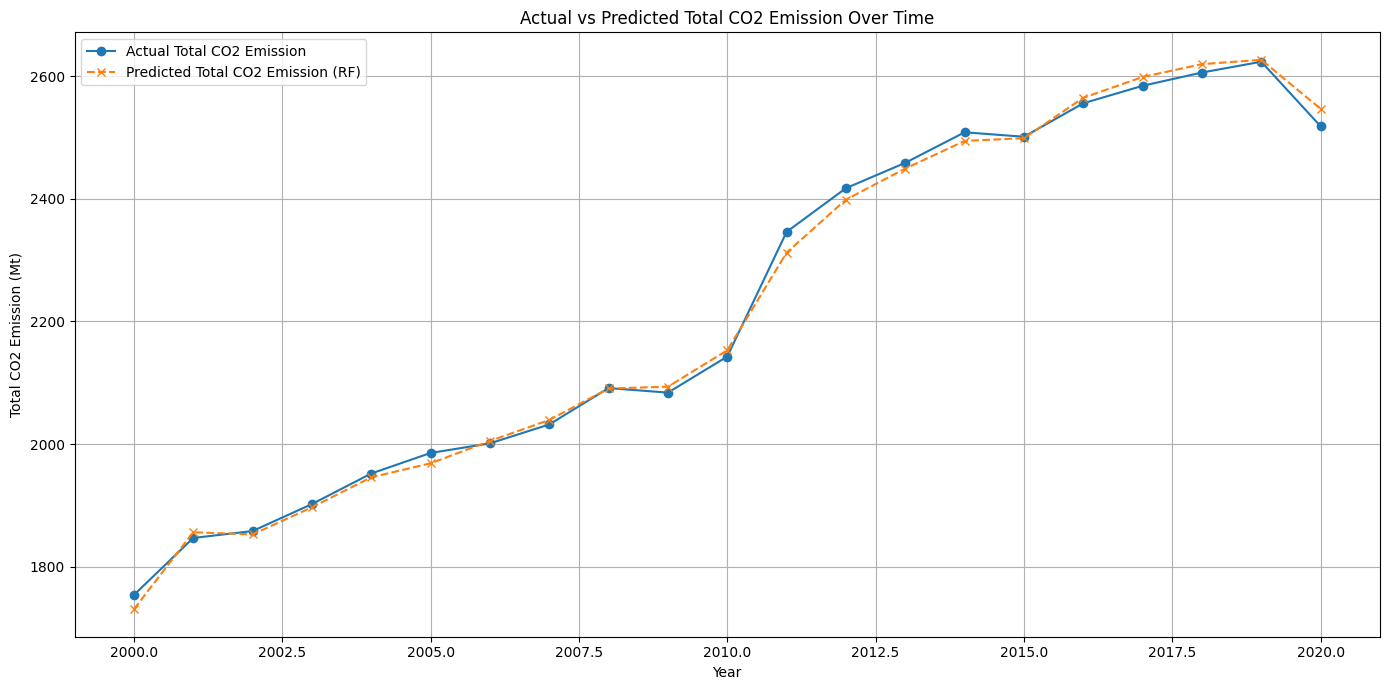

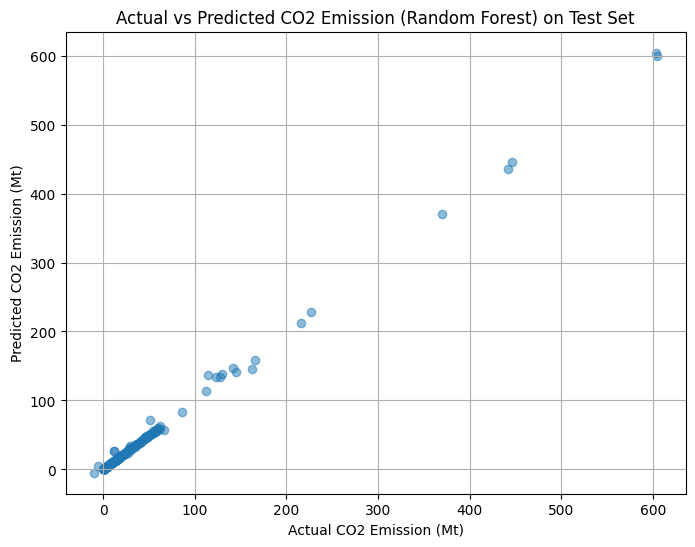

In [ ]:
# prompt: use the model yo make predictions of y and plot them alongside actual values on a graph of total co2(y) against time

import matplotlib.pyplot as plt
# Use the trained Random Forest model to make predictions
y_pred = rf_model.predict(X_scaled)

# Create a new DataFrame with 'Year', actual 'Total CO2 Emission including LUCF (Mt)', and predicted values
plot_df = df[['Year', 'Total CO2 Emission including LUCF (Mt)']].copy()
plot_df['Predicted CO2 Emission (RF)'] = y_pred

# Sort by Year for the plot
plot_df = plot_df.sort_values(by='Year')

# Aggregate actual and predicted CO2 emissions by Year for plotting
# This assumes you want to see the trend over time across all countries
plot_df_agg = plot_df.groupby('Year').agg({
    'Total CO2 Emission including LUCF (Mt)': 'sum',
    'Predicted CO2 Emission (RF)': 'sum'
}).reset_index()


# Plot actual vs predicted values over time
plt.figure(figsize=(14, 7))
plt.plot(plot_df_agg['Year'], plot_df_agg['Total CO2 Emission including LUCF (Mt)'], label='Actual Total CO2 Emission', marker='o')
plt.plot(plot_df_agg['Year'], plot_df_agg['Predicted CO2 Emission (RF)'], label='Predicted Total CO2 Emission (RF)', marker='x', linestyle='--')

plt.title('Actual vs Predicted Total CO2 Emission Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Plot scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual CO2 Emission (Mt)')
plt.ylabel('Predicted CO2 Emission (Mt)')
plt.title('Actual vs Predicted CO2 Emission (Random Forest) on Test Set')
plt.grid(True)
plt.show()

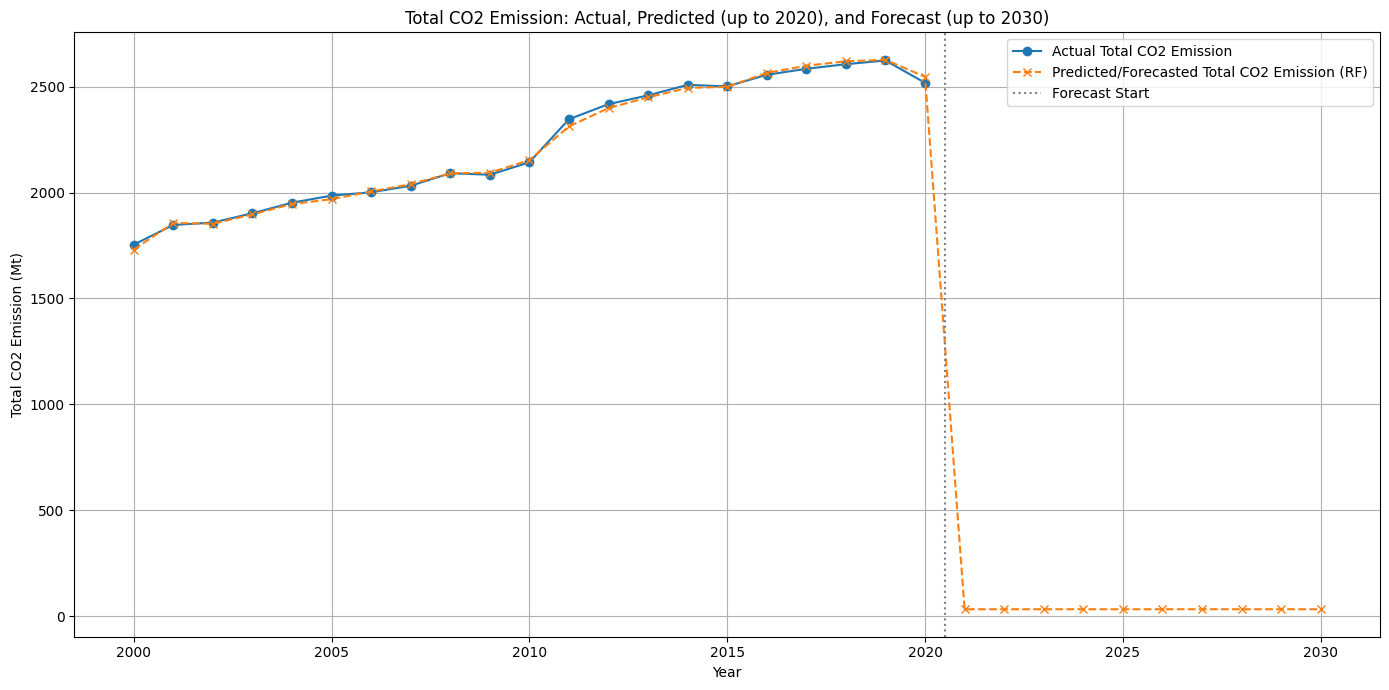


Forecasted Total CO2 Emissions (Random Forest) up to 2030:


,Year,Predicted CO2 Emission (RF)
0,2021,33.1757
1,2022,33.1757
2,2023,33.1757
3,2024,33.1757
4,2025,33.1757
5,2026,33.1757
6,2027,33.1757
7,2028,33.1757
8,2029,33.1757
9,2030,33.1757


In [ ]:
# prompt: use the model yo make predictions of y and plot them alongside actual values on a graph of total co2(y) against time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# --- Forecasting up to 2030 ---

# Get the last available year in the dataset
last_year = df['Year'].max()

# Create a DataFrame for future years (up to 2030)
future_years = pd.DataFrame({'Year': range(last_year + 1, 2031)})

# To make predictions for future years, we need the values for the other features for those years.
# A simple approach for forecasting is to use the average values of the features from the historical data,
# or to extrapolate trends. Given the data structure (country-year), a simple linear extrapolation
# might not be appropriate without considering trends per country or region.
# For a basic forecast based on the *overall* trend, we can assume that the relationship
# learned by the model holds, but we need features for future years.

# Let's simplify for demonstration: we will assume that the *average* feature values across all historical data
# will hold for the future years, and see how the model predicts based on just the year trend.
# This is a strong assumption and a more sophisticated time-series forecasting model
# or feature engineering would be needed for a robust forecast.

# Let's take the average of all features (except Year) from the original scaled data
# and apply this average to future years.
# We need to calculate the mean of the original unscaled features (except 'Year')
average_features_values = X.drop('Year', axis=1).mean()

# Create a dataframe for future features, replicating the average values and adding future years
future_df = pd.DataFrame(np.tile(average_features_values.values, (len(future_years), 1)), columns=average_features_values.index)
future_df['Year'] = future_years['Year'].values # Add the future years

# Ensure the columns are in the same order as the original features (X) before scaling
future_df = future_df[X.columns]

# Now, scale this future dataframe using the same scaler
future_X_scaled = scaler.transform(future_df)


# Make predictions for future years using the trained Random Forest model
future_y_pred_rf = rf_model.predict(future_X_scaled)

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted CO2 Emission (RF)': future_y_pred_rf
})

# Combine actual aggregated data up to the last historical year and the forecast data
combined_plot_df = pd.concat([plot_df_agg, forecast_df])

# Sort by Year for plotting
combined_plot_df = combined_plot_df.sort_values(by='Year')

# Plot actual values (up to last historical year) and the full predicted/forecasted line
plt.figure(figsize=(14, 7))

# Plot actual data up to the last historical year
plt.plot(combined_plot_df[combined_plot_df['Year'] <= last_year]['Year'],
         combined_plot_df[combined_plot_df['Year'] <= last_year]['Total CO2 Emission including LUCF (Mt)'],
         label='Actual Total CO2 Emission', marker='o')

# Plot predicted values (on historical data) and forecasted values (on future data)
plt.plot(combined_plot_df['Year'],
         combined_plot_df['Predicted CO2 Emission (RF)'],
         label='Predicted/Forecasted Total CO2 Emission (RF)', marker='x', linestyle='--')

# Highlight the separation point between historical and forecast
plt.axvline(x=last_year + 0.5, color='gray', linestyle=':', label='Forecast Start')

plt.title('Total CO2 Emission: Actual, Predicted (up to 2020), and Forecast (up to 2030)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nForecasted Total CO2 Emissions (Random Forest) up to 2030:")
display(forecast_df)

## Classifier

In [ ]:
# prompt: define a logistic classifier model to classify counties as 'Green ' or 'not green' if their energy emissions are blow and above the mean respectively. assign classes with labels after classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split # Ensure train_test_split is imported
from sklearn.preprocessing import MinMaxScaler # Ensure MinMaxScaler is imported

# Filter the DataFrame to include only data from the year 2020
df_2020 = df[df['Year'] == 2020].copy()

# Calculate the 40th percentile of the 'Total CO2 Emission including LUCF (Mt)' across all data points in 2020
percentile_40 = df_2020['Total CO2 Emission including LUCF (Mt)'].quantile(0.4)

print(f"\n40th percentile of Total CO2 Emission including LUCF (Mt) in 2020: {percentile_40:.2f} Mt")


# Create the target variable: 'Green' if below the 40th percentile, 'not green' if above or equal to the 40th percentile
df_2020['Green Label'] = df_2020['Total CO2 Emission including LUCF (Mt)'].apply(lambda x: 'Green' if x < percentile_40 else 'not green')

# Define features (X_clf) and target (y_clf) for classification using 2020 data
# Use the same feature columns that were intended for the original scaler (excluding target/identifier columns)
try:
    feature_columns = [col for col in df.columns if col not in ['Country', 'Code', 'Sub-Region',
                                                            'Total CO2 Emission including LUCF (Mt)',
                                                            'Total CO2 Emission excluding LUCF (Mt)',
                                                            'Green Label', 'Predicted Green Label', 'Predicted Green Label 2020']
                   and df[col].dtype in ['int64', 'float64']] # Define feature columns again for clarity

    X_2020 = df_2020[feature_columns].copy()

    # Create a new scaler and fit it specifically on the 2020 features
    scaler_2020 = MinMaxScaler()
    X_2020_scaled = scaler_2020.fit_transform(X_2020)


except NameError:
    print("Error: 'df' not found. Please ensure the dataframe is loaded.")
    raise # Re-raise the exception
except KeyError as e:
     print(f"Error: Missing feature column in 2020 data: {e}")
     print("Please check the column names in your dataframe.")
     raise


y_clf_2020 = df_2020['Green Label'] # Using the new binary target variable for 2020 data

# Check the distribution of the target variable before splitting
print("\nDistribution of Green Label in 2020 data before splitting:")
print(y_clf_2020.value_counts())

# Split the 2020 data for the classifier
# Use stratify for classification to maintain the proportion of classes in train and test sets
# Use a smaller test size if the 2020 dataset is small
test_size_2020 = 0.3 # Adjust test size as needed for 2020 data
if len(df_2020) * (1 - test_size_2020) < 2 or len(df_2020) * test_size_2020 < 2:
     print(f"Warning: Test size {test_size_2020} might be too large for the 2020 dataset size ({len(df_2020)}). Adjusting test_size.")
     test_size_2020 = 0.5 # Use 50% for train/test if dataset is very small


# Check if there are at least two classes in the 2020 data before splitting with stratify
if len(y_clf_2020.unique()) < 2:
     print("\nError: 2020 data contains only one class after applying the 40th percentile threshold.")
     print("Cannot train a classifier with only one class in the target variable.")
else:
    X_train_clf_2020, X_test_clf_2020, y_train_clf_2020, y_test_clf_2020 = train_test_split(
        X_2020_scaled, y_clf_2020, test_size=test_size_2020, random_state=42, stratify=y_clf_2020
    )

    # Check the distribution of the target variable after splitting
    print("\nDistribution of Green Label in 2020 training set:")
    print(y_train_clf_2020.value_counts())
    print("\nDistribution of Green Label in 2020 testing set:")
    print(y_test_clf_2020.value_counts())


    # Define the Logistic Regression model
    logistic_model_2020 = LogisticRegression(solver='liblinear', random_state=42) # 'liblinear' is good for small datasets and binary classification

    # Train the model
    # Check if the training set contains more than one class before training
    if len(y_train_clf_2020.unique()) < 2:
        print("\nError: 2020 training set still contains only one class after splitting.")
        print("Consider adjusting the test_size or using different sampling techniques.")
    else:
        logistic_model_2020.fit(X_train_clf_2020, y_train_clf_2020)

        print("Logistic Regression model trained successfully on 2020 data.")

        # Make predictions on the test set
        y_pred_clf_2020 = logistic_model_2020.predict(X_test_clf_2020)

        # Evaluate the classifier
        print("\nClassification Report (2020 data):")
        print(classification_report(y_test_clf_2020, y_pred_clf_2020))

        print("\nConfusion Matrix (2020 data):")
        print(confusion_matrix(y_test_clf_2020, y_pred_clf_2020))

        # Add the predicted labels to the original DataFrame (or a copy) for 2020 data
        # Ensure the rows align
        df.loc[df['Year'] == 2020, 'Predicted Green Label 2020'] = logistic_model_2020.predict(X_2020_scaled)


        print("\nDataFrame with Predicted Green Labels for 2020:")
        display(df[df['Year'] == 2020][['Country', 'Year', 'Total CO2 Emission including LUCF (Mt)', 'Green Label', 'Predicted Green Label 2020']].head())

        # Display value counts for the actual and predicted labels to see the distribution
        print("\nValue counts of Actual Green Label in 2020 data:")
        print(df_2020['Green Label'].value_counts())

        print("\nValue counts of Predicted Green Label in 2020 data:")
        print(df[df['Year'] == 2020]['Predicted Green Label 2020'].value_counts())


40th percentile of Total CO2 Emission including LUCF (Mt) in 2020: 11.66 Mt

Distribution of Green Label in 2020 data before splitting:
Green Label
not green    32
Green        22
Name: count, dtype: int64

Distribution of Green Label in 2020 training set:
Green Label
not green    22
Green        15
Name: count, dtype: int64

Distribution of Green Label in 2020 testing set:
Green Label
not green    10
Green         7
Name: count, dtype: int64
Logistic Regression model trained successfully on 2020 data.

Classification Report (2020 data):
              precision    recall  f1-score   support

       Green       1.00      0.14      0.25         7
   not green       0.62      1.00      0.77        10

    accuracy                           0.65        17
   macro avg       0.81      0.57      0.51        17
weighted avg       0.78      0.65      0.56        17


Confusion Matrix (2020 data):
[[ 1  6]
 [ 0 10]]

DataFrame with Predicted Green Labels for 2020:


,Country,Year,Total CO2 Emission including LUCF (Mt),Green Label,Predicted Green Label 2020
20,Algeria,2020,161.76,not green,not green
41,Angola,2020,55.30,not green,not green
62,Benin,2020,18.69,not green,not green
83,Botswana,2020,46.91,not green,not green
104,Burkina Faso,2020,29.56,not green,not green



Value counts of Actual Green Label in 2020 data:
Green Label
not green    32
Green        22
Name: count, dtype: int64

Value counts of Predicted Green Label in 2020 data:
Predicted Green Label 2020
not green    52
Green         2
Name: count, dtype: int64


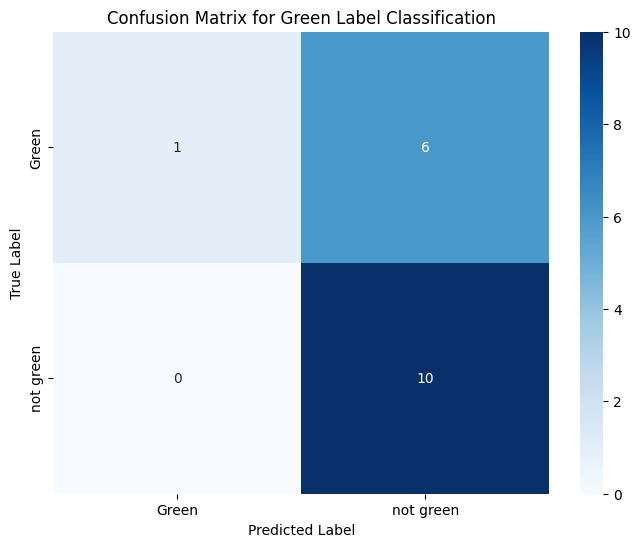

In [ ]:
# prompt: test the model and visualize a confusion matrix

import matplotlib.pyplot as plt
# Generate the confusion matrix
cm = confusion_matrix(y_test_clf_2020, y_pred_clf_2020, labels=logistic_model_2020.classes_)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=logistic_model_2020.classes_,
            yticklabels=logistic_model_2020.classes_)
plt.title('Confusion Matrix for Green Label Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

XGBoost Linear Regression model trained successfully.
XGBoost Linear Regressor Mean Squared Error: 6.07
XGBoost Linear Regressor R-squared: 1.00


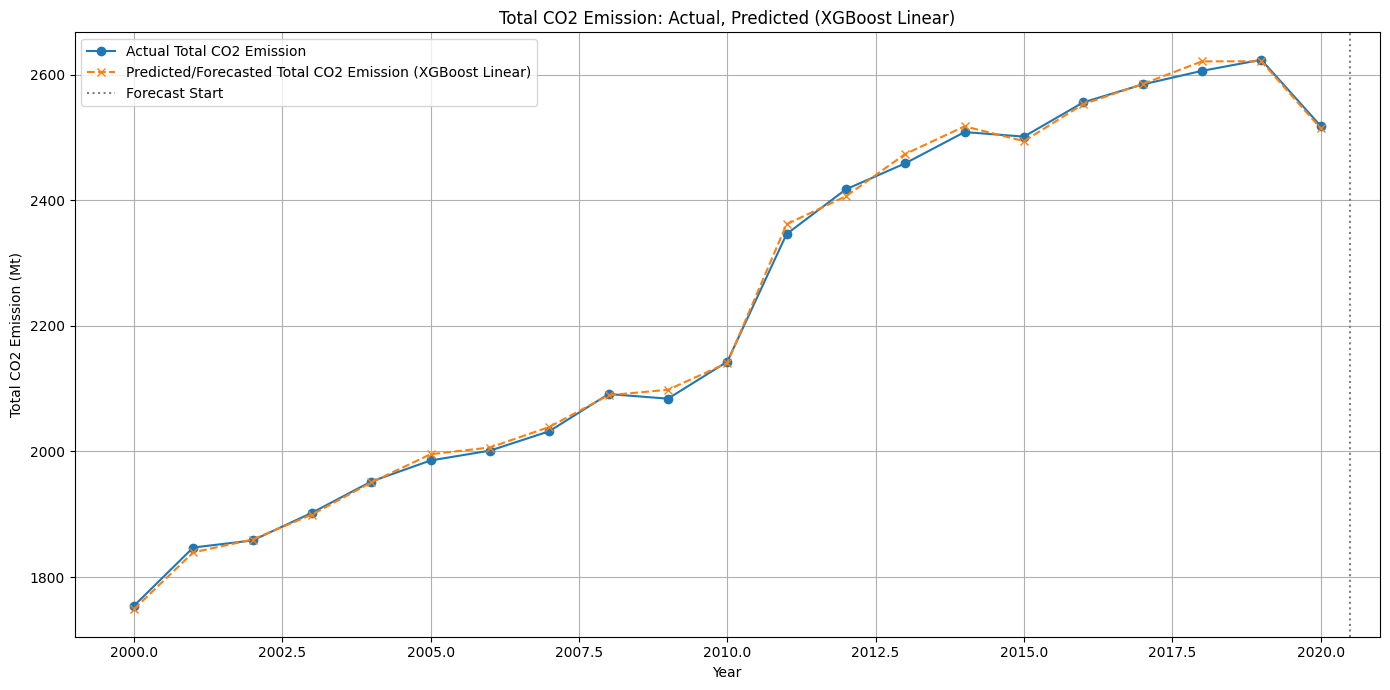


Forecasted Total CO2 Emissions (XGBoost Linear) up to 2030:


,Year,Predicted CO2 Emission (XGBoost Linear)
0,2021,40.714142
1,2022,40.662491
2,2023,40.610844
3,2024,40.559193
4,2025,40.507542
5,2026,40.455894
6,2027,40.404243
7,2028,40.352592
8,2029,40.300945
9,2030,40.249294


In [ ]:
# prompt: use xgboost linear regression model to train test and the model, with y being total carbon emmisions and x features being everything else except totals and non numeric values. Print model accuracy and use the model to visualise and forecast total co2 against time up to 2030

import numpy as np
!pip install xgboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# Select features (X) and target (y)
# Drop non-numeric and identifier columns for modelling
X = df.drop(['Country','Code', 'Sub-Region', 'Total CO2 Emission including LUCF (Mt)','Total CO2 Emission excluding LUCF (Mt)'], axis=1)
y = df['Total CO2 Emission including LUCF (Mt)']

# Handle potential non-numeric columns if any remain after the initial drop
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Warning: Dropping non-numeric column '{col}' before scaling.")
        X = X.drop(col, axis=1)

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor model for linear regression
# Use 'reg:squarederror' objective for regression and enable the linear booster
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', booster='gblinear', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

print("XGBoost Linear Regression model trained successfully.")

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Linear Regressor Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost Linear Regressor R-squared: {r2_xgb:.2f}")

# Use the trained XGBoost model to make predictions on the full scaled data
y_pred_full_xgb = xgb_model.predict(X_scaled)

# Create a new DataFrame with 'Year', actual 'Total CO2 Emission including LUCF (Mt)', and predicted values
plot_df_xgb = df[['Year', 'Total CO2 Emission including LUCF (Mt)']].copy()
plot_df_xgb['Predicted CO2 Emission (XGBoost Linear)'] = y_pred_full_xgb

# Sort by Year for the plot
plot_df_xgb = plot_df_xgb.sort_values(by='Year')

# Aggregate actual and predicted CO2 emissions by Year for plotting
plot_df_agg_xgb = plot_df_xgb.groupby('Year').agg({
    'Total CO2 Emission including LUCF (Mt)': 'sum',
    'Predicted CO2 Emission (XGBoost Linear)': 'sum'
}).reset_index()

# --- Forecasting up to 2030 ---

# Get the last available year in the dataset
last_year = df['Year'].max()

# Create a DataFrame for future years (up to 2030)
future_years = pd.DataFrame({'Year': range(last_year + 1, 2031)})

# Take the average of all historical features (except Year) from the original unscaled data
average_features_values = X.drop('Year', axis=1).mean()

# Create a dataframe for future features, replicating the average values and adding future years
future_df = pd.DataFrame(np.tile(average_features_values.values, (len(future_years), 1)), columns=average_features_values.index)
future_df['Year'] = future_years['Year'].values # Add the future years

# Ensure the columns are in the same order as the original features (X) before scaling
future_df = future_df[X.columns]

# Now, scale this future dataframe using the same scaler
future_X_scaled = scaler.transform(future_df)

# Make predictions for future years using the trained XGBoost Linear model
future_y_pred_xgb = xgb_model.predict(future_X_scaled)

# Create a DataFrame for the forecast results
forecast_df_xgb = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted CO2 Emission (XGBoost Linear)': future_y_pred_xgb
})

# Combine actual aggregated data up to the last historical year and the forecast data
combined_plot_df_xgb = pd.concat([plot_df_agg_xgb])

# Sort by Year for plotting
combined_plot_df_xgb = combined_plot_df_xgb.sort_values(by='Year')

# Plot actual values (up to last historical year) and the full predicted/forecasted line
plt.figure(figsize=(14, 7))

# Plot actual data up to the last historical year
plt.plot(combined_plot_df_xgb[combined_plot_df_xgb['Year'] <= last_year]['Year'],
         combined_plot_df_xgb[combined_plot_df_xgb['Year'] <= last_year]['Total CO2 Emission including LUCF (Mt)'],
         label='Actual Total CO2 Emission', marker='o')

# Plot predicted values (on historical data) and forecasted values (on future data)
plt.plot(combined_plot_df_xgb['Year'],
         combined_plot_df_xgb['Predicted CO2 Emission (XGBoost Linear)'],
         label='Predicted/Forecasted Total CO2 Emission (XGBoost Linear)', marker='x', linestyle='--')

# Highlight the separation point between historical and forecast
plt.axvline(x=last_year + 0.5, color='gray', linestyle=':', label='Forecast Start')

plt.title('Total CO2 Emission: Actual, Predicted (XGBoost Linear)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nForecasted Total CO2 Emissions (XGBoost Linear) up to 2030:")
display(forecast_df_xgb)


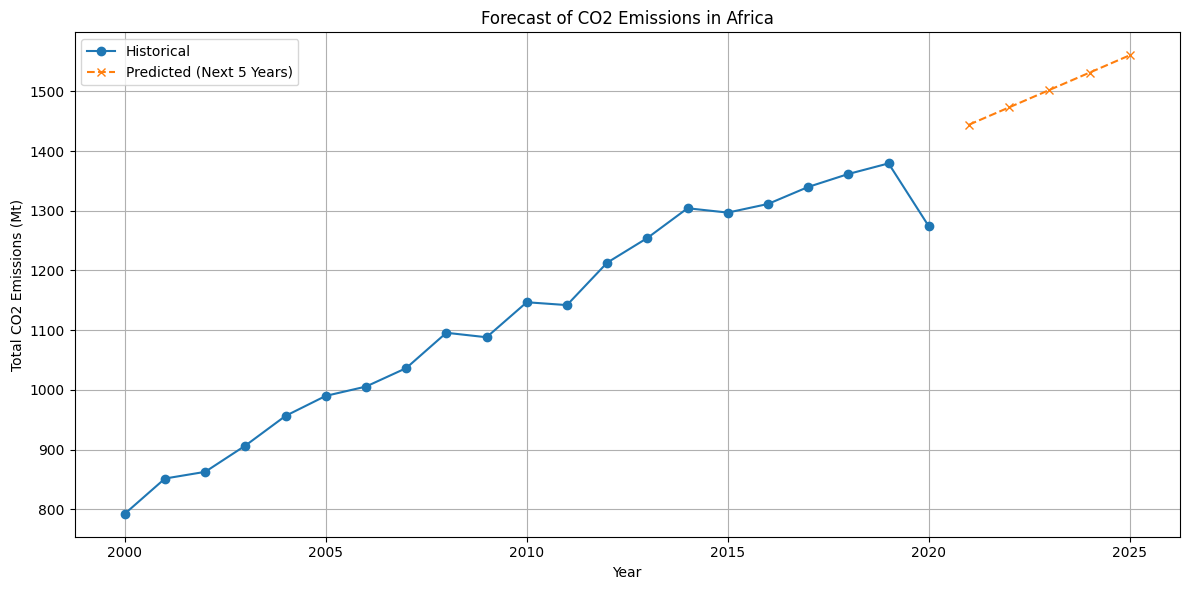

,Year,Predicted CO2 Emissions (Mt)
0,2021,1444.235857
1,2022,1473.327818
2,2023,1502.419779
3,2024,1531.511740
4,2025,1560.603701


In [ ]:
# 26. Predictive Modeling: Forecasting CO2 Emissions for the Next 5 Years (Africa Total)
from sklearn.linear_model import LinearRegression

# Aggregate emissions per year across Africa
yearly_data = df.groupby('Year')['Total CO2 Emission excluding LUCF (Mt)'].sum().reset_index()
X = yearly_data[['Year']]
y = yearly_data['Total CO2 Emission excluding LUCF (Mt)']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict next 5 years
future_years = pd.DataFrame({'Year': list(range(X['Year'].max()+1, X['Year'].max()+6))})
future_preds = model.predict(future_years)

# Plot historical + predicted emissions
plt.figure(figsize=(12,6))
plt.plot(X, y, label='Historical', marker='o')
plt.plot(future_years, future_preds, label='Predicted (Next 5 Years)', marker='x', linestyle='--')
plt.title('Forecast of CO2 Emissions in Africa')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display forecasted values
forecast_df = future_years.copy()
forecast_df['Predicted CO2 Emissions (Mt)'] = future_preds
forecast_df


Dropdown(description='Country:', index=53, options=('Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', …

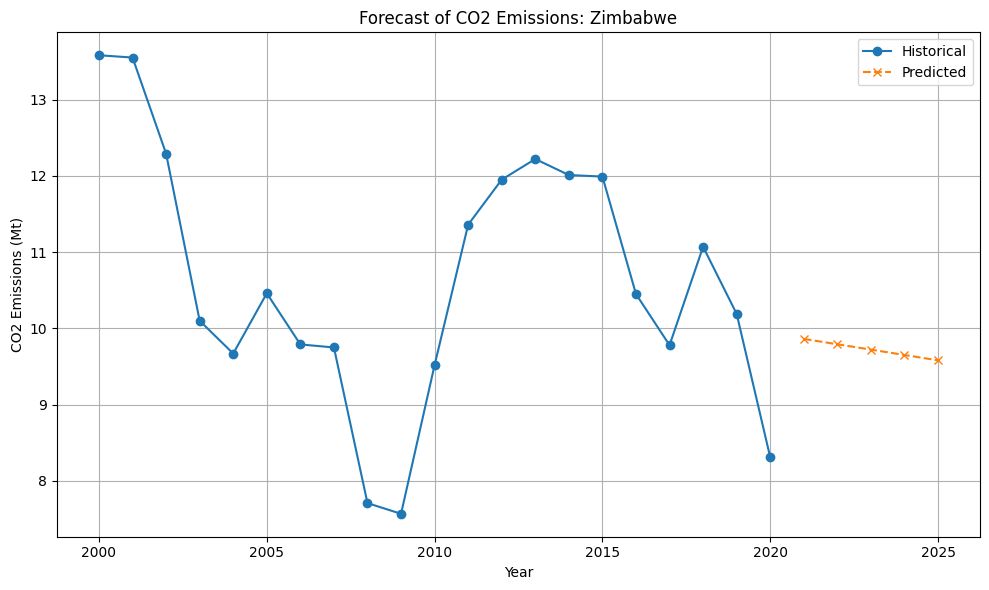

,Year,Predicted CO2 Emissions (Mt)
0,2021,9.862143
1,2022,9.791948
2,2023,9.721753
3,2024,9.651558
4,2025,9.581364


In [ ]:
# 27. Interactive: Forecast CO2 Emissions for Selected Country (Next 5 Years)
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display, clear_output

def predict_country_emissions(country):
    data = df[df['Country'] == country].groupby('Year')['Total CO2 Emission excluding LUCF (Mt)'].sum().reset_index()
    if len(data) < 2:
        print(f'Not enough data for {country}')
        return
    X = data[['Year']]
    y = data['Total CO2 Emission excluding LUCF (Mt)']
    model = LinearRegression()
    model.fit(X, y)

    future_years = pd.DataFrame({'Year': list(range(X['Year'].max()+1, X['Year'].max()+6))})
    future_preds = model.predict(future_years)

    plt.figure(figsize=(10,6))
    plt.plot(X, y, label='Historical', marker='o')
    plt.plot(future_years, future_preds, label='Predicted', marker='x', linestyle='--')
    plt.title(f'Forecast of CO2 Emissions: {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (Mt)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    forecast_df = future_years.copy()
    forecast_df['Predicted CO2 Emissions (Mt)'] = future_preds
    display(forecast_df)

dropdown_country_pred = widgets.Dropdown(options=sorted(df['Country'].unique()), description='Country:')

def on_country_pred_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(dropdown_country_pred)
        predict_country_emissions(change['new'])

dropdown_country_pred.observe(on_country_pred_change)
display(dropdown_country_pred)
predict_country_emissions(dropdown_country_pred.value)

Energy data prepared for Neural Network.
X_train_energy shape: torch.Size([907, 1])
X_test_energy shape: torch.Size([227, 1])
y_train_energy shape: torch.Size([907, 1])
y_test_energy shape: torch.Size([227, 1])

Starting training for NN Linear Regression on Energy...
Epoch [100/1000], Loss: 0.0122
Epoch [200/1000], Loss: 0.0125
Epoch [300/1000], Loss: 0.0122
Epoch [400/1000], Loss: 0.0122
Epoch [500/1000], Loss: 0.0122
Epoch [600/1000], Loss: 0.0124
Epoch [700/1000], Loss: 0.0122
Epoch [800/1000], Loss: 0.0124
Epoch [900/1000], Loss: 0.0122
Epoch [1000/1000], Loss: 0.0122
Training finished.
Test Loss (MSE): 0.0100


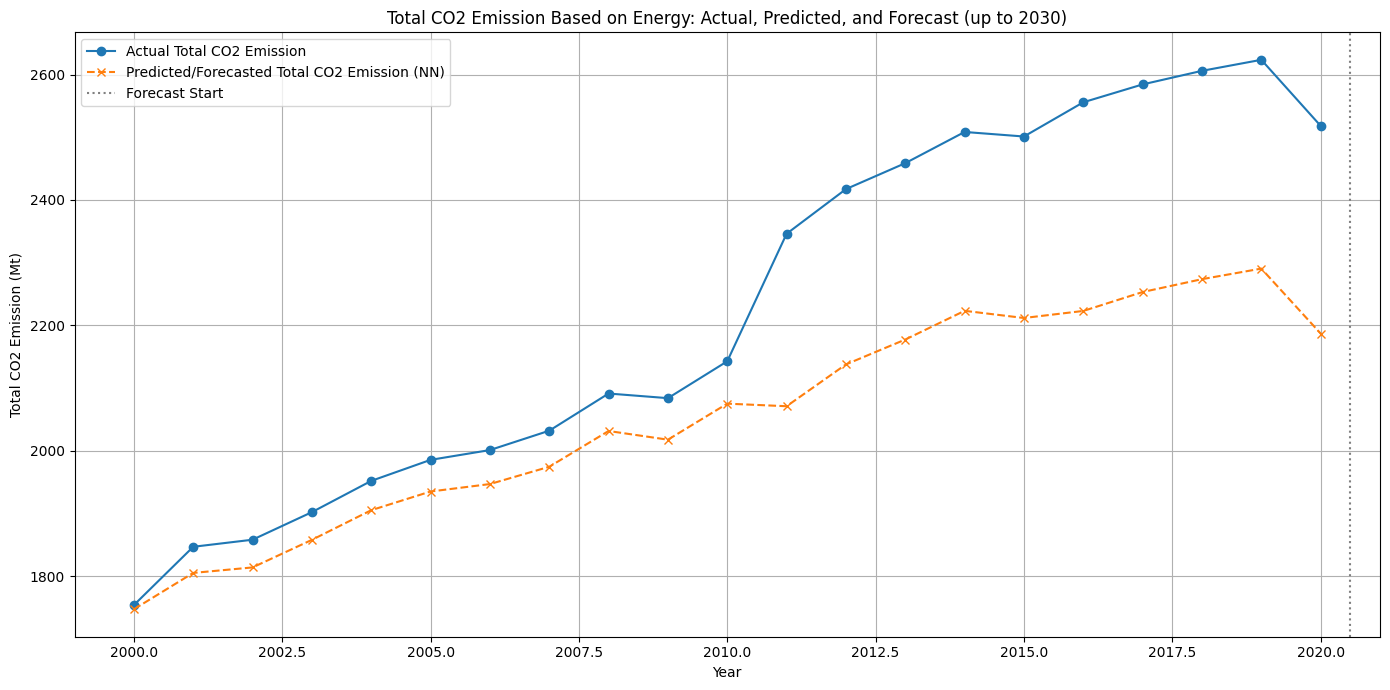


Forecasted Total CO2 Emissions (NN based on Energy) up to 2030:


,Year,Predicted CO2 Emission (NN)
0,2021,43.477024
1,2022,43.969418
2,2023,44.461807
3,2024,44.954201
4,2025,45.446590
5,2026,45.938980
6,2027,46.431377
7,2028,46.923771
8,2029,47.416157
9,2030,47.908546


In [ ]:
#  use a neural network linear regression model to train test and presdict time against Energy only and plot actaul against preictions and forecasted values in a single line plot

import pandas as pd
import matplotlib.pyplot as plt
# Filter data to include only 'Year' and 'Energy (Mt)'
df_energy = df[['Year', 'Energy (Mt)', 'Total CO2 Emission including LUCF (Mt)']].copy()

# Remove rows with missing values in 'Energy (Mt)' if any exist after imputation
df_energy = df_energy.dropna(subset=['Energy (Mt)'])

# Select features (X_energy) and target (y_energy) for the energy-based model
X_energy = df_energy[['Energy (Mt)']]
y_energy = df_energy['Total CO2 Emission including LUCF (Mt)']

# Scale the data
scaler_energy_X = MinMaxScaler()
scaler_energy_y = MinMaxScaler() # Scale the target as well for NN stability

X_energy_scaled = scaler_energy_X.fit_transform(X_energy)
y_energy_scaled = scaler_energy_y.fit_transform(y_energy.values.reshape(-1, 1)) # Reshape y for scaler

# Split the data into training and testing sets
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(
    X_energy_scaled, y_energy_scaled, test_size=0.2, random_state=42
)

# Convert numpy arrays to PyTorch tensors
X_train_energy_tensor = torch.tensor(X_train_energy, dtype=torch.float32)
X_test_energy_tensor = torch.tensor(X_test_energy, dtype=torch.float32)
y_train_energy_tensor = torch.tensor(y_train_energy, dtype=torch.float32)
y_test_energy_tensor = torch.tensor(y_test_energy, dtype=torch.float32)

print("Energy data prepared for Neural Network.")
print(f"X_train_energy shape: {X_train_energy_tensor.shape}")
print(f"X_test_energy shape: {X_test_energy_tensor.shape}")
print(f"y_train_energy shape: {y_train_energy_tensor.shape}")
print(f"y_test_energy shape: {y_test_energy_tensor.shape}")

# Define the Neural Network Linear Regression Model
class NNLinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(NNLinearRegression, self).__init__()
        # Using a sequential model for simplicity with just a linear layer
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 1), # Single linear layer
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

# Instantiate the model
input_dim_energy = X_train_energy_tensor.shape[1] # Should be 1
model_energy = NNLinearRegression(input_dim_energy)

# Define Loss Function and Optimizer
loss_fn_energy = nn.MSELoss() # Mean Squared Error for regression
optimizer_energy = torch.optim.Adam(model_energy.parameters(), lr=0.01) # Adam optimizer

# Training loop
epochs = 1000
batch_size = 32

# Create DataLoader for batching
train_dataset_energy = TensorDataset(X_train_energy_tensor, y_train_energy_tensor)
train_loader_energy = DataLoader(train_dataset_energy, batch_size=batch_size, shuffle=True)

test_dataset_energy = TensorDataset(X_test_energy_tensor, y_test_energy_tensor)
test_loader_energy = DataLoader(test_dataset_energy, batch_size=batch_size, shuffle=False)


print("\nStarting training for NN Linear Regression on Energy...")
for epoch in range(epochs):
    model_energy.train() # Set model to training mode
    total_loss = 0
    for batch_X, batch_y in train_loader_energy:
        # Forward pass
        pred = model_energy(batch_X)
        loss = loss_fn_energy(pred, batch_y)

        # Backward pass and optimization
        optimizer_energy.zero_grad()
        loss.backward()
        optimizer_energy.step()

        total_loss += loss.item() * batch_X.size(0) # Sum of loss per sample

    epoch_loss = total_loss / len(train_dataset_energy)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

print("Training finished.")

# Evaluation
model_energy.eval() # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculation
    test_preds_scaled = model_energy(X_test_energy_tensor)
    test_loss = loss_fn_energy(test_preds_scaled, y_test_energy_tensor).item()
    print(f"Test Loss (MSE): {test_loss:.4f}")

    # Convert scaled predictions back to original scale
    test_preds = scaler_energy_y.inverse_transform(test_preds_scaled.numpy())

# Make predictions on the entire dataset for plotting actual vs predicted on historical data
model_energy.eval()
with torch.no_grad():
    all_preds_scaled = model_energy(torch.tensor(X_energy_scaled, dtype=torch.float32))
    all_preds = scaler_energy_y.inverse_transform(all_preds_scaled.numpy())


# Create a DataFrame for plotting historical actual vs predicted
plot_df_energy = df_energy[['Year', 'Total CO2 Emission including LUCF (Mt)']].copy()
plot_df_energy['Predicted CO2 Emission (NN)'] = all_preds.flatten() # Flatten predictions

# Aggregate by Year for plotting trends
plot_df_energy_agg = plot_df_energy.groupby('Year').agg({
    'Total CO2 Emission including LUCF (Mt)': 'sum',
    'Predicted CO2 Emission (NN)': 'sum'
}).reset_index()


# --- Forecasting up to 2030 ---

# We need to forecast 'Energy (Mt)' for future years to predict 'Total CO2 Emission'.
# A simple approach is to extrapolate the trend of 'Energy (Mt)' over time.
# We can use a simple linear regression model or just take the average increase per year.

# Let's fit a simple linear model to 'Energy (Mt)' vs 'Year'
from sklearn.linear_model import LinearRegression

energy_time_model = LinearRegression()
# Use the original unscaled Energy data and Year
energy_time_model.fit(df_energy[['Year']], df_energy['Energy (Mt)'])

# Get the last available year
last_year_energy = df_energy['Year'].max()

# Create future years DataFrame
future_years_energy_df = pd.DataFrame({'Year': range(last_year_energy + 1, 2031)})

# Predict future 'Energy (Mt)' values
future_energy_preds = energy_time_model.predict(future_years_energy_df[['Year']])

# Create a DataFrame for future energy values
future_energy_df = pd.DataFrame({
    'Year': future_years_energy_df['Year'],
    'Energy (Mt)': future_energy_preds
})

# Use the NN model trained on Energy to predict future CO2 emissions based on forecasted energy
# We need to scale the future energy values using the same scaler used for X_energy
future_X_energy_scaled = scaler_energy_X.transform(future_energy_df[['Energy (Mt)']])

# Make predictions for future years using the trained NN model
model_energy.eval()
with torch.no_grad():
    future_y_preds_scaled_energy = model_energy(torch.tensor(future_X_energy_scaled, dtype=torch.float32))
    future_y_preds_energy = scaler_energy_y.inverse_transform(future_y_preds_scaled_energy.numpy())

# Create a DataFrame for the forecast results
forecast_df_energy = pd.DataFrame({
    'Year': future_years_energy_df['Year'],
    'Predicted CO2 Emission (NN)': future_y_preds_energy.flatten()
})


# Combine historical actual data, historical predicted data, and forecast data
combined_plot_df_energy = pd.concat([plot_df_energy_agg])

# Sort by Year for plotting
combined_plot_df_energy = combined_plot_df_energy.sort_values(by='Year')

# Plot actual, predicted (historical), and forecasted (future) values in a single line plot
plt.figure(figsize=(14, 7))

# Plot actual data up to the last historical year
plt.plot(combined_plot_df_energy[combined_plot_df_energy['Year'] <= last_year_energy]['Year'],
         combined_plot_df_energy[combined_plot_df_energy['Year'] <= last_year_energy]['Total CO2 Emission including LUCF (Mt)'],
         label='Actual Total CO2 Emission', marker='o')

# Plot predicted values (on historical data) and forecasted values (on future data)
# This uses the 'Predicted CO2 Emission (NN)' column which contains predictions for historical and forecast for future
plt.plot(combined_plot_df_energy['Year'],
         combined_plot_df_energy['Predicted CO2 Emission (NN)'],
         label='Predicted/Forecasted Total CO2 Emission (NN)', marker='x', linestyle='--')

# Highlight the separation point between historical and forecast
plt.axvline(x=last_year_energy + 0.5, color='gray', linestyle=':', label='Forecast Start')

plt.title('Total CO2 Emission Based on Energy: Actual, Predicted, and Forecast (up to 2030)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nForecasted Total CO2 Emissions (NN based on Energy) up to 2030:")
display(forecast_df_energy)


In [ ]:
# deploy the linear regression random forest model and create an interactive interface to predict carbon emmissions given energy

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display

# Retrain the RandomForestRegressor model on the Energy (Mt) and Transportation (Mt) features
# We will use the original unscaled 'Energy (Mt)', 'Transportation (Mt)', and 'Total CO2 Emission including LUCF (Mt)'
# for training the RF model specifically for this prediction interface.

# Filter data to include only 'Energy (Mt)', 'Transportation (Mt)' and 'Total CO2 Emission including LUCF (Mt)'
df_features_rf = df[['Energy (Mt)', 'Electricity/Heat (Mt)', 'Total CO2 Emission including LUCF (Mt)']].copy()

# Remove rows with missing values in selected features if any exist after imputation
df_features_rf = df_features_rf.dropna(subset=['Energy (Mt)', 'Electricity/Heat (Mt)'])

# Select features (X_rf) and target (y_rf)
X_rf = df_features_rf[['Energy (Mt)', 'Electricity/Heat (Mt)']]
y_rf = df_features_rf['Total CO2 Emission including LUCF (Mt)']

# Train the Random Forest Regressor model on the selected features
rf_model_features = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_features.fit(X_rf, y_rf)

print("Random Forest Regressor model trained on Energy (Mt) and Electricity/Heat (Mt) features.")

# Create the interactive interface
energy_input = widgets.FloatText(
    value=0.0,
    description='Energy (Mt):',
    disabled=False
)

transport_input = widgets.FloatText(
    value=0.0,
    description='Electricity/Heat (Mt):',
    disabled=False
)


output_text = widgets.Output()

def predict_co2(energy_value, transport_value):
    # Predict using the trained Random Forest model
    # The model expects a 2D array with features in the correct order
    prediction = rf_model_features.predict([[energy_value, transport_value]])[0]
    return prediction

def on_input_change(change):
    with output_text:
        output_text.clear_output()
        try:
            energy_value = energy_input.value
            transport_value = transport_input.value

            if energy_value < 0 or transport_value < 0:
                 print("Please enter non-negative values for Energy and Electricity.")
                 return

            predicted_co2 = predict_co2(energy_value, transport_value)
            print(f"Predicted Total CO2 Emission: {predicted_co2:.2f} Mt")
        except ValueError:
            print("Invalid input. Please enter numbers.")


energy_input.observe(on_input_change, names='value')
transport_input.observe(on_input_change, names='value')


print("Enter Energy (Mt) and Electricity/Heat (Mt) values to predict CO2 emissions:")
display(energy_input, transport_input, output_text)

Random Forest Regressor model trained on Energy (Mt) and Electricity/Heat (Mt) features.
Enter Energy (Mt) and Electricity/Heat (Mt) values to predict CO2 emissions:


FloatText(value=0.0, description='Energy (Mt):')

FloatText(value=0.0, description='Electricity/Heat (Mt):')

Output()

In [ ]:
# deploy the linear regression random forest model and create an interactive interface to predict carbon emmissions given energy

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display

# Retrain the RandomForestRegressor model on the Energy (Mt) and Transportation (Mt) features
# We will use the original unscaled 'Energy (Mt)', 'Transportation (Mt)', and 'Total CO2 Emission including LUCF (Mt)'
# for training the RF model specifically for this prediction interface.

# Filter data to include only 'Energy (Mt)', 'Transportation (Mt)' and 'Total CO2 Emission including LUCF (Mt)'
df_features_rf = df[['Energy (Mt)', 'Transportation (Mt)', 'Total CO2 Emission including LUCF (Mt)']].copy()

# Remove rows with missing values in selected features if any exist after imputation
df_features_rf = df_features_rf.dropna(subset=['Energy (Mt)', 'Transportation (Mt)'])

# Select features (X_rf) and target (y_rf)
X_rf = df_features_rf[['Energy (Mt)', 'Transportation (Mt)']]
y_rf = df_features_rf['Total CO2 Emission including LUCF (Mt)']

# Train the Random Forest Regressor model on the selected features
rf_model_features = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_features.fit(X_rf, y_rf)

print("Random Forest Regressor model trained on Energy (Mt) and Transportation (Mt) features.")

# Create the interactive interface
energy_input = widgets.FloatText(
    value=0.0,
    description='Energy (Mt):',
    disabled=False
)

transport_input = widgets.FloatText(
    value=0.0,
    description='Transportation (Mt):',
    disabled=False
)


output_text = widgets.Output()

def predict_co2(energy_value, transport_value):
    # Predict using the trained Random Forest model
    # The model expects a 2D array with features in the correct order
    prediction = rf_model_features.predict([[energy_value, transport_value]])[0]
    return prediction

def on_input_change(change):
    with output_text:
        output_text.clear_output()
        try:
            energy_value = energy_input.value
            transport_value = transport_input.value

            if energy_value < 0 or transport_value < 0:
                 print("Please enter non-negative values for Energy and Transportation.")
                 return

            predicted_co2 = predict_co2(energy_value, transport_value)
            print(f"Predicted Total CO2 Emission: {predicted_co2:.2f} Mt")
        except ValueError:
            print("Invalid input. Please enter numbers.")


energy_input.observe(on_input_change, names='value')
transport_input.observe(on_input_change, names='value')


print("Enter Energy (Mt) and Transportation (Mt) values to predict CO2 emissions:")
display(energy_input, transport_input, output_text)

Random Forest Regressor model trained on Energy (Mt) and Transportation (Mt) features.
Enter Energy (Mt) and Transportation (Mt) values to predict CO2 emissions:


FloatText(value=0.0, description='Energy (Mt):')

FloatText(value=0.0, description='Transportation (Mt):')

Output()